In [215]:
#Based on:
#url = 'https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python'

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

#### Helper Functions

In [126]:
def scatterplot(feature, data=train_data, ylimit=(0,800000)):
    return data.plot.scatter(x=feature, y = 'SalePrice', ylim=ylimit)

In [2]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
train_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
train_data.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


1. Understand the problem - we want to understand what is going on, what the data is, and what we want to find out
2. Univariable Study - we want to look at our dependent variable (Sales Price) and try to know more about it
3. Multivariate study - Understand how the variables relate (independent vs dependent)
4. Basic Cleaning - handle missing data, outliers, categorical variables
5. Test Assumptions - Check if data meets assumptions required by multivariate techniques

In [5]:
#invite people for the Kaggle party
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [6]:
train_data.Alley.describe()

count       91
unique       2
top       Grvl
freq        50
Name: Alley, dtype: object

In [7]:
train_data.dtypes.to_csv("HousingDtypes.csv")

In [8]:
def plotfreq(feature, data=train_data, row=1, column = 2):
    fx, axes = plt.subplots(row, column, figsize=(row+10, column*4))
    axes[0].set_title(feature + " vs Frequency")
    axes[1].set_title(feature + " vs Sale Price")
    fig1_gen = sns.countplot(data=data, x=feature, ax=axes[0])
    fig2_gen = sns.barplot(data=data, x=feature, y='SalePrice', ax=axes[1])

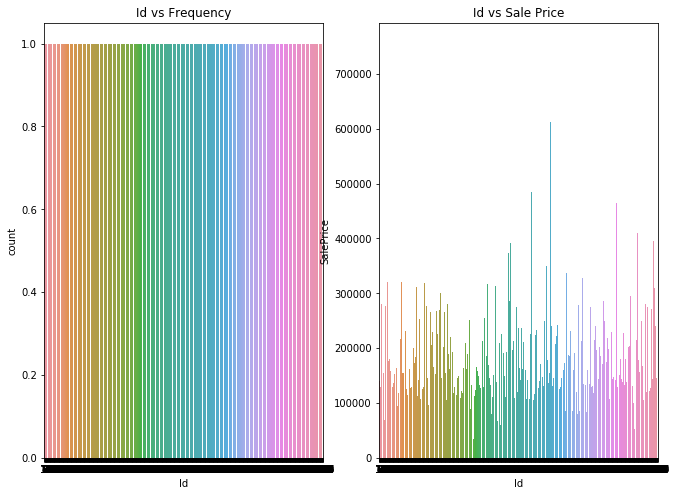

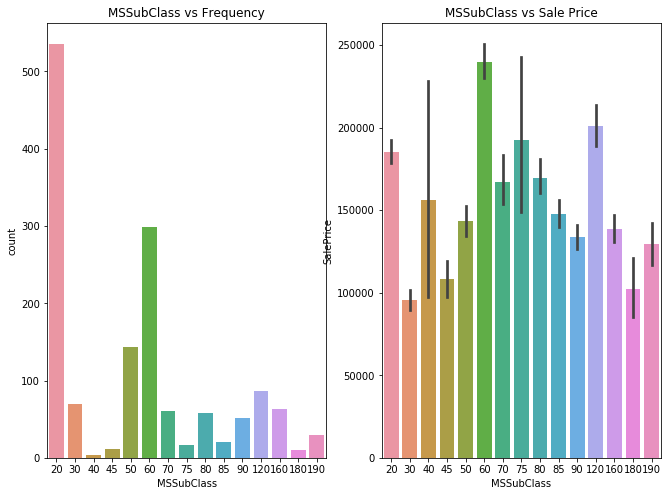

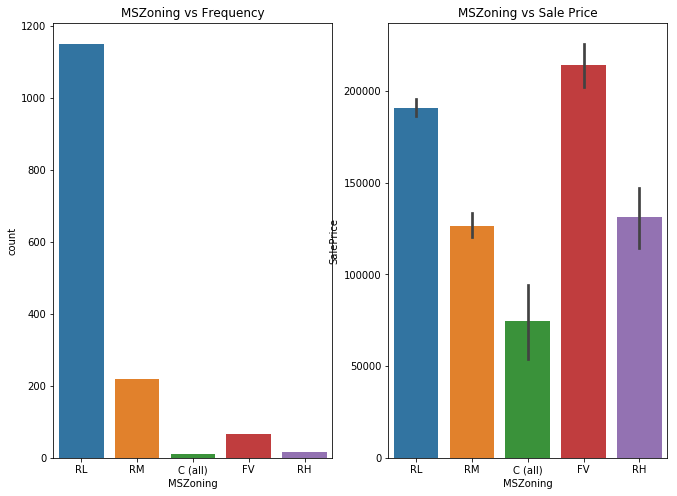

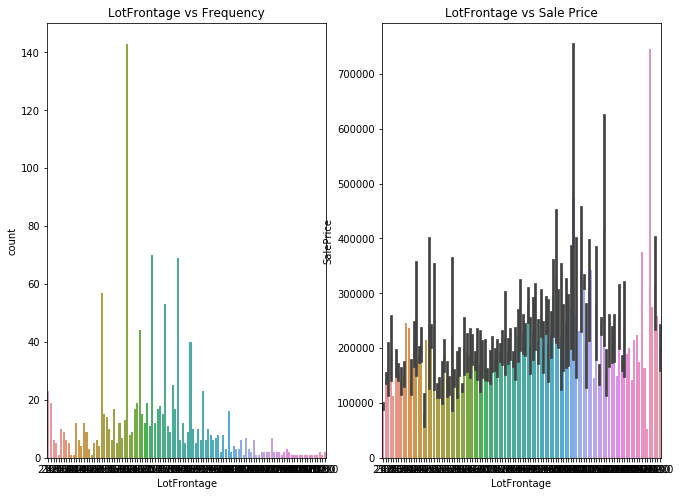

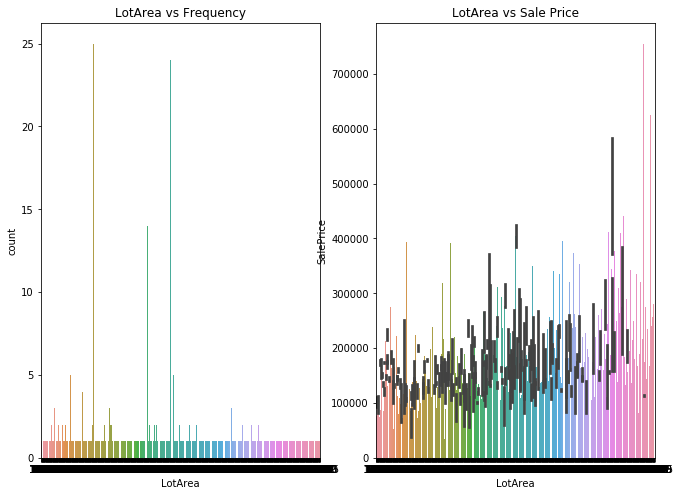

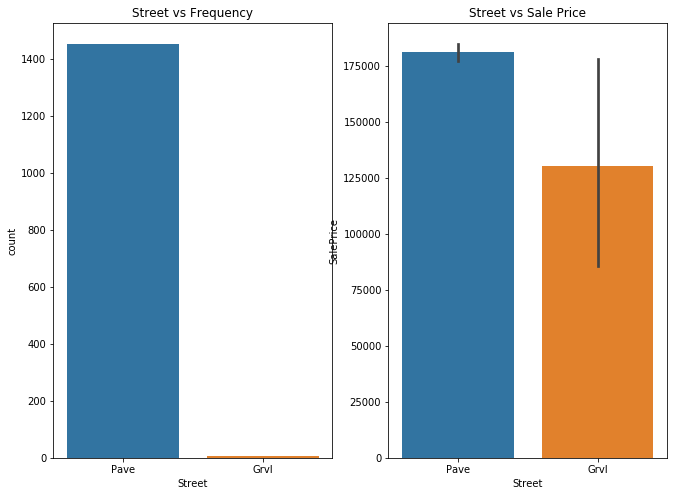

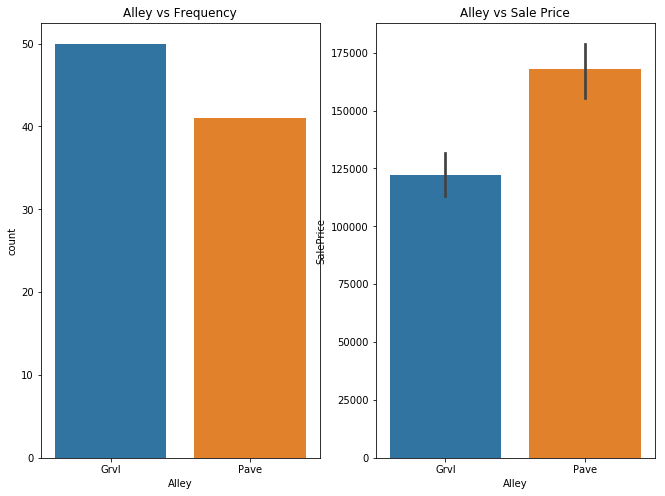

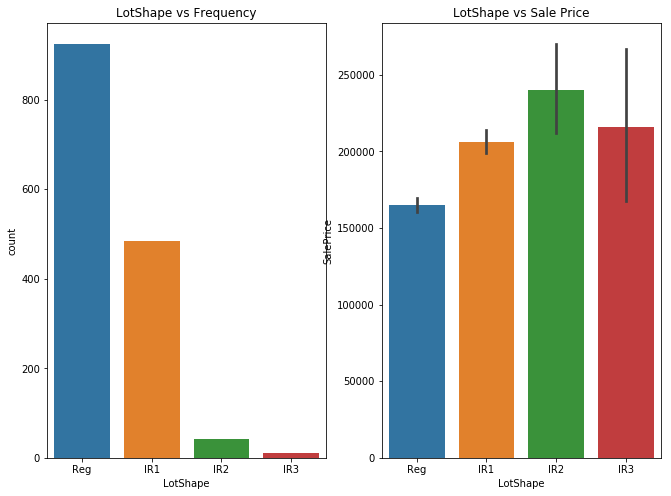

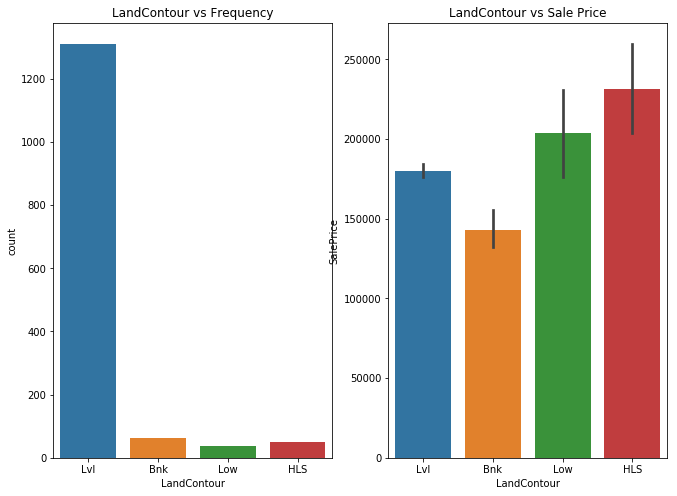

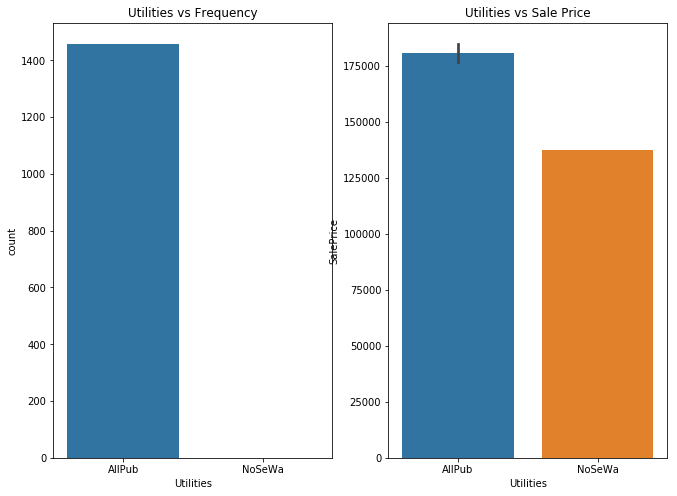

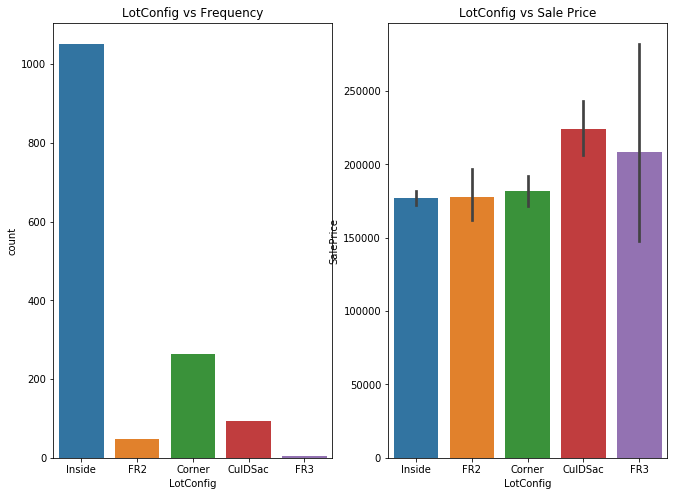

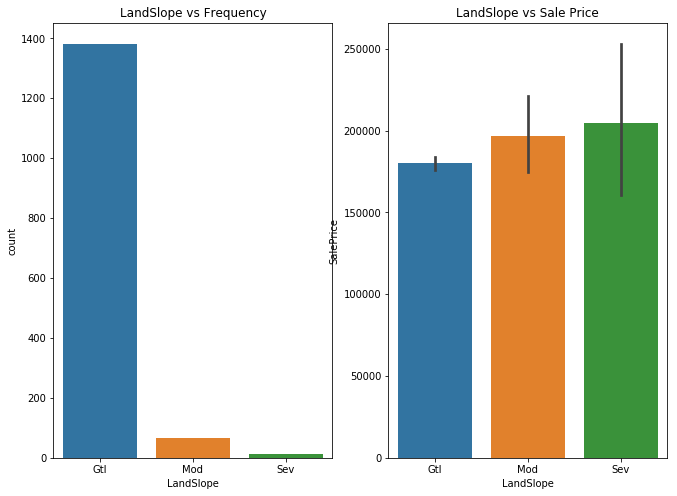

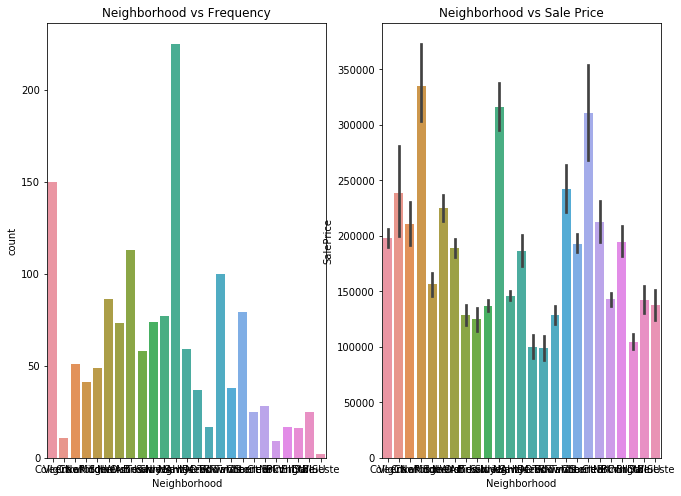

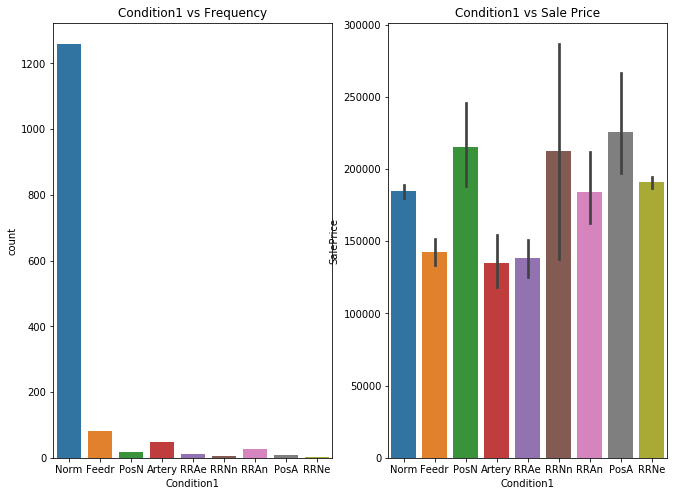

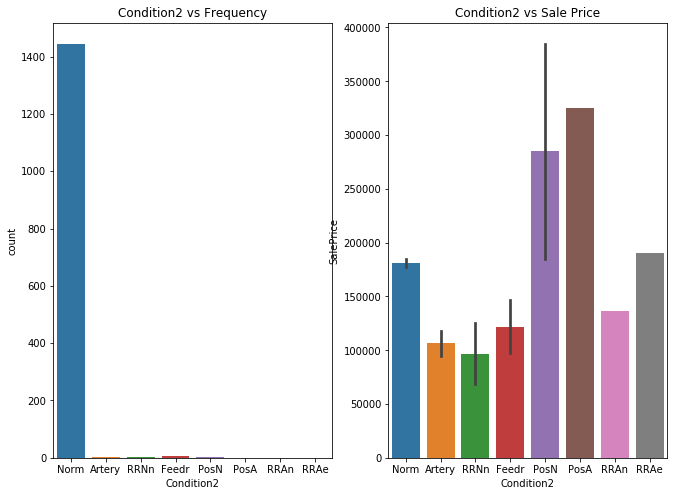

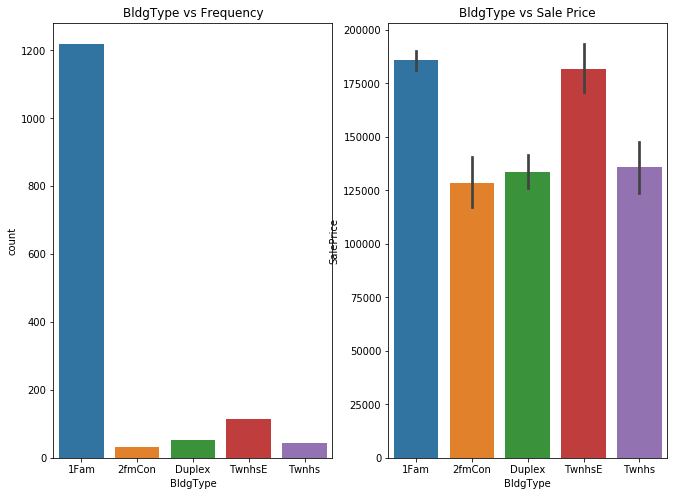

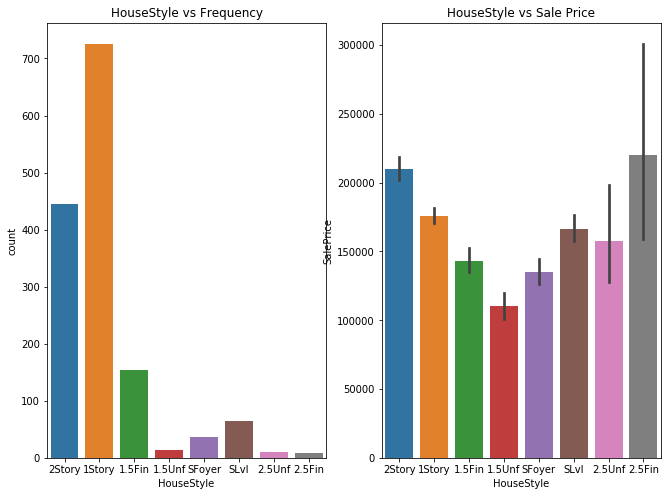

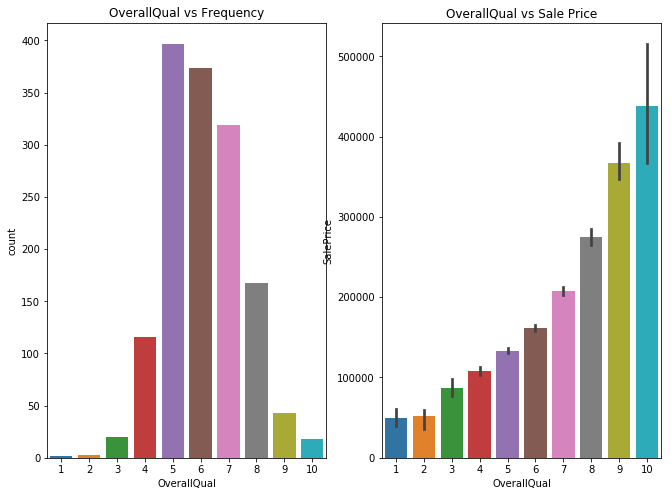

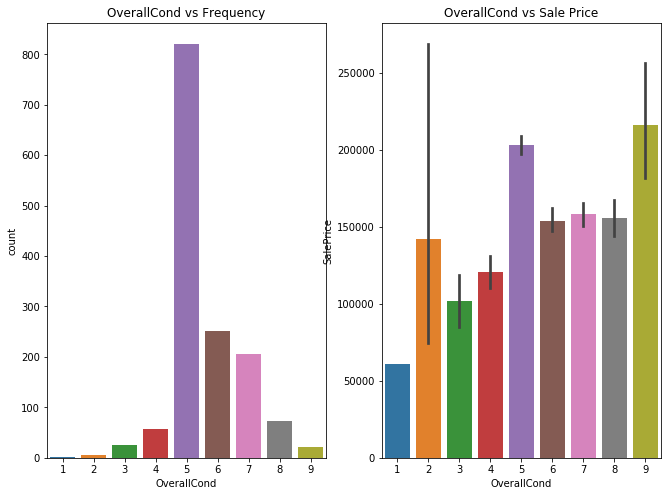

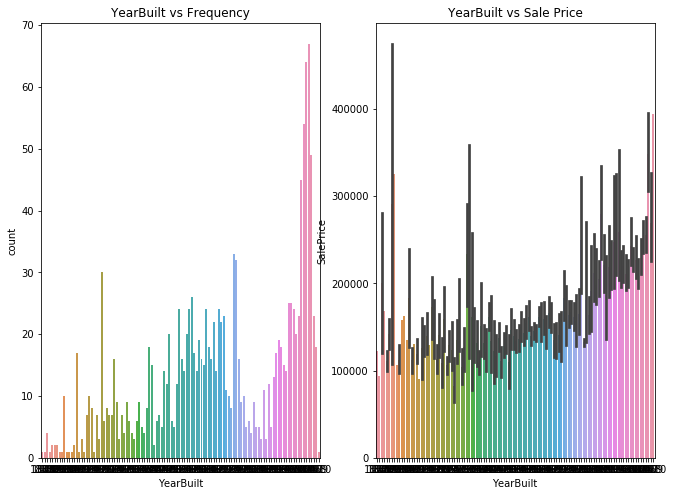

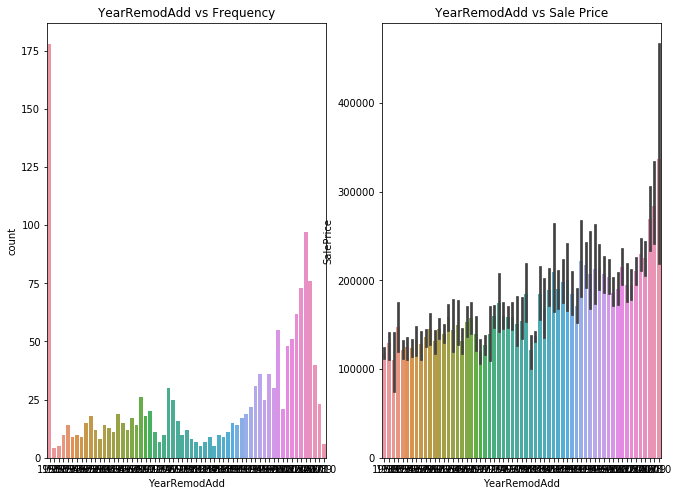

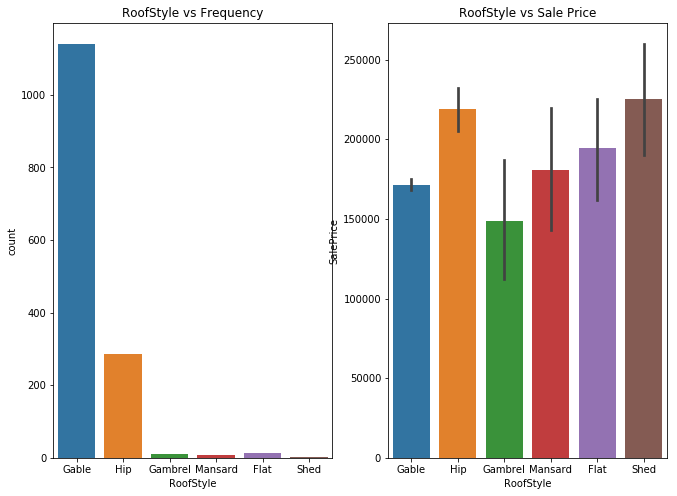

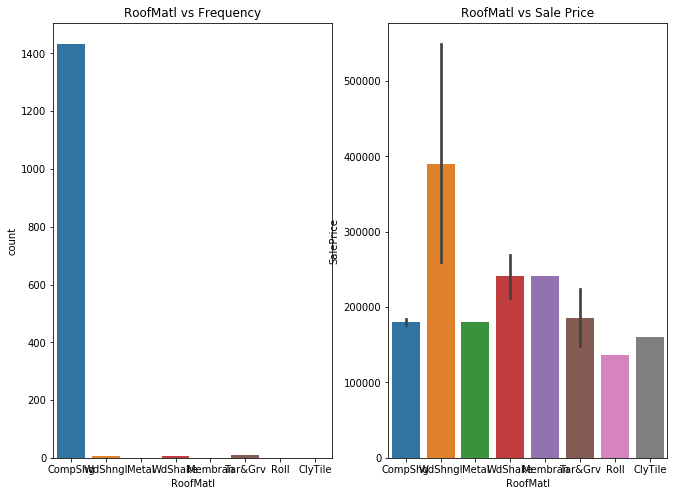

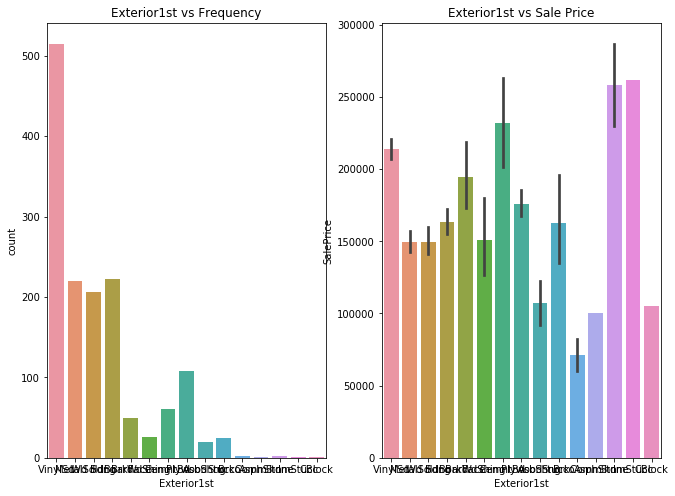

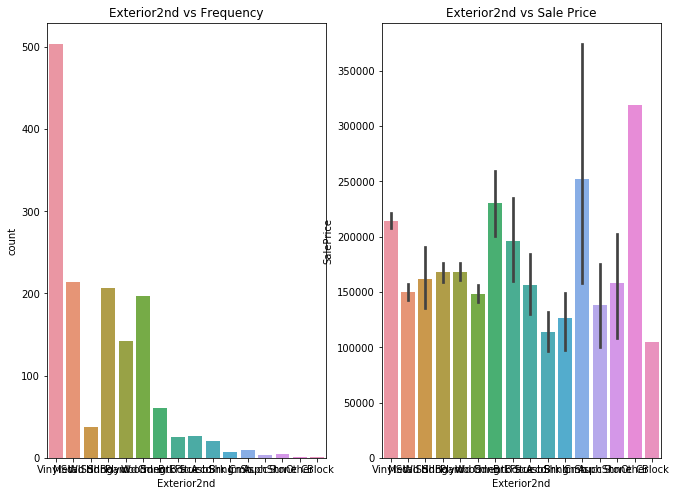

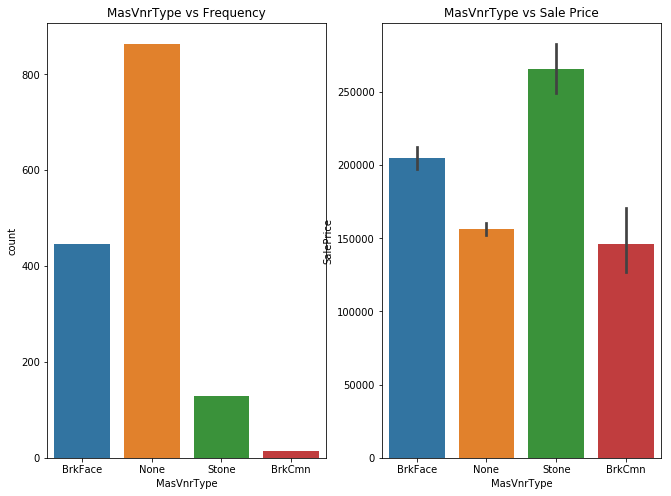

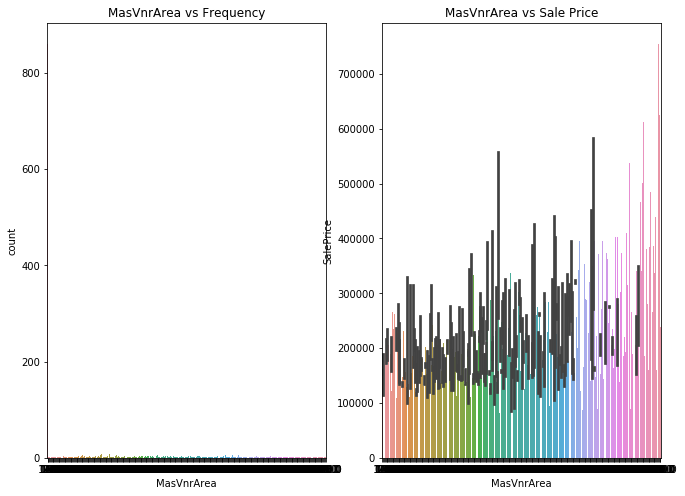

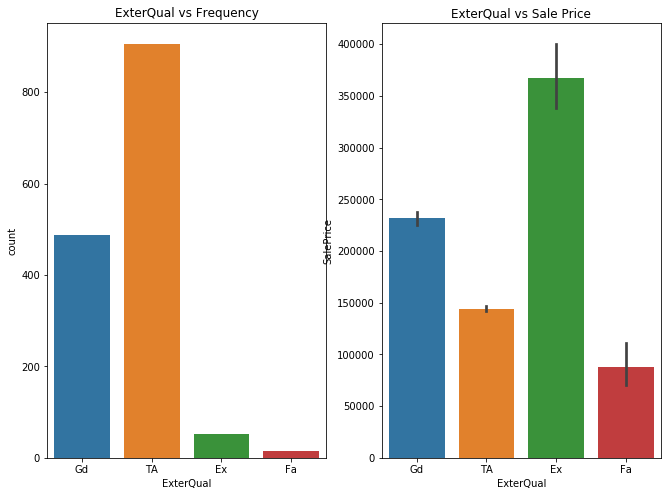

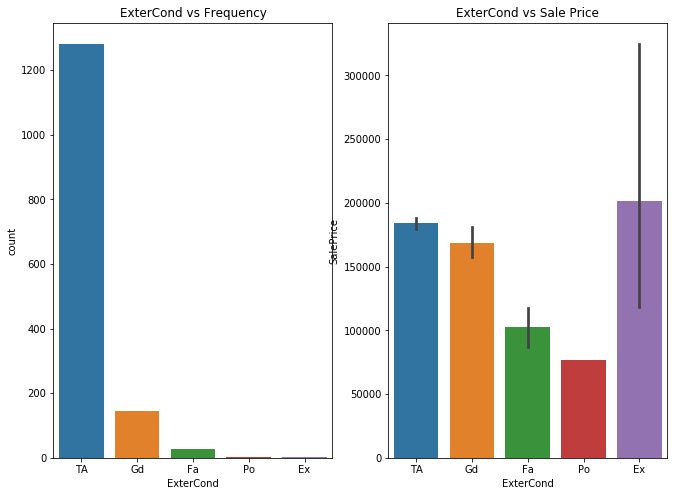

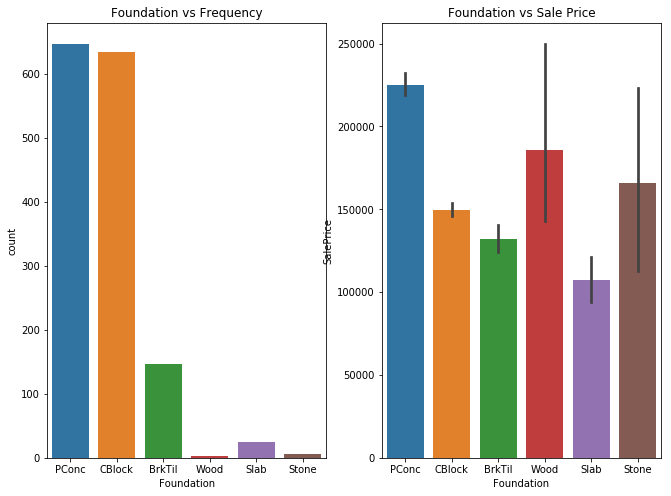

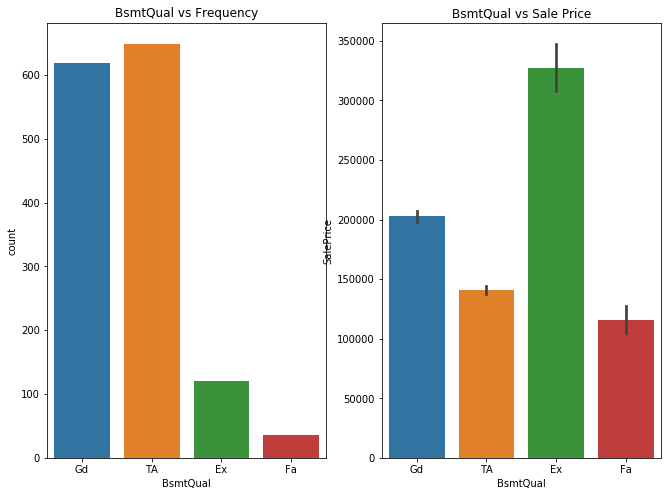

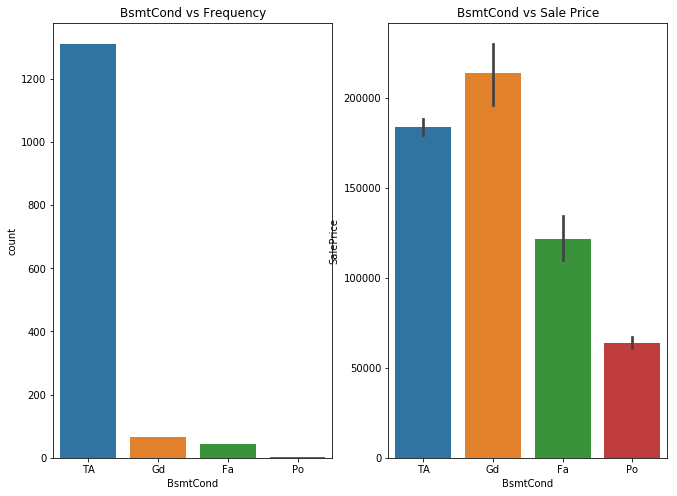

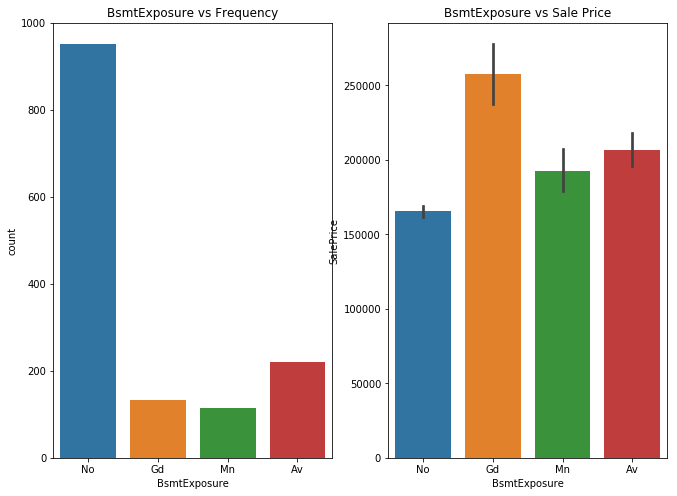

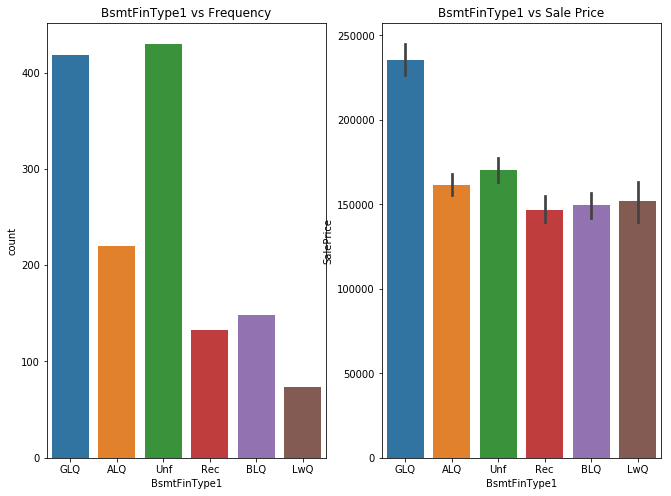

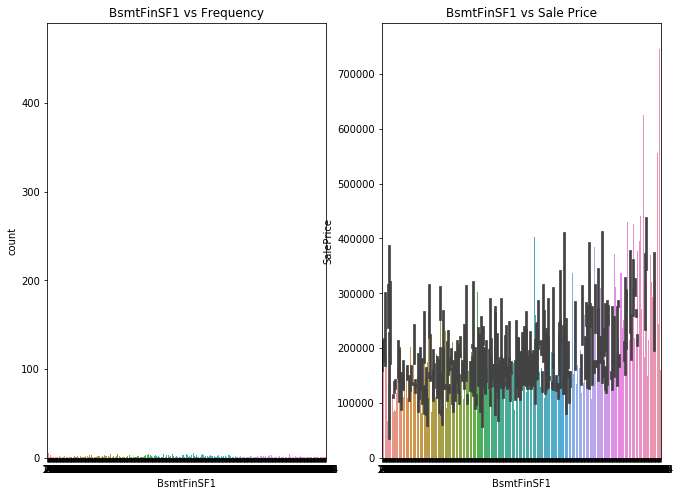

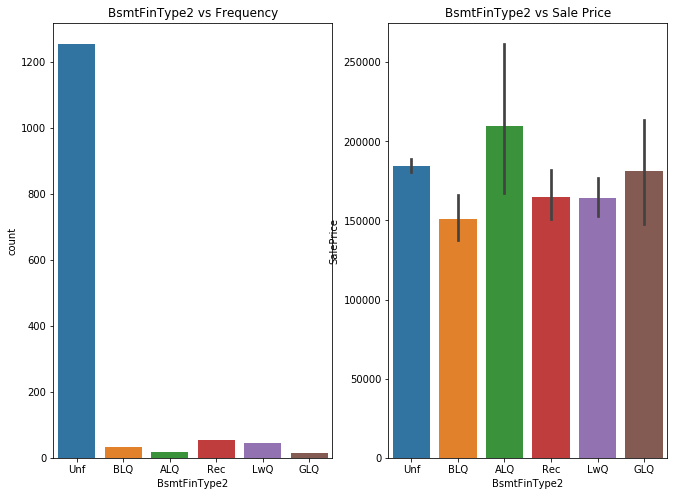

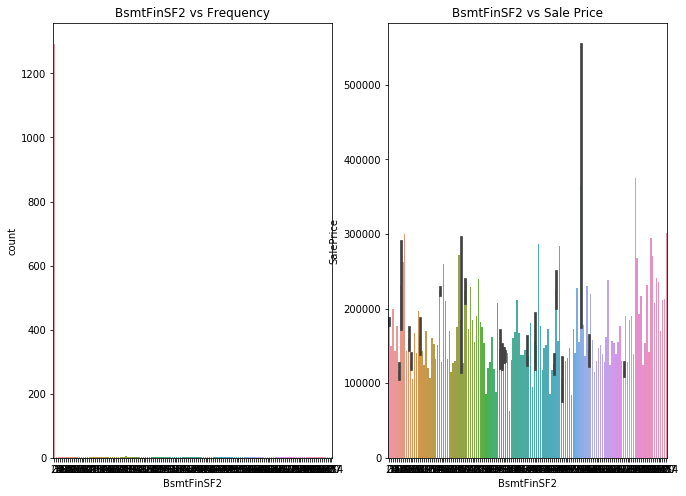

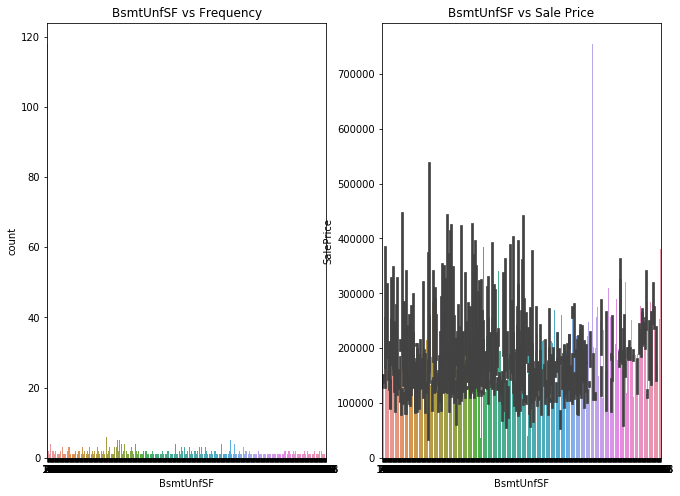

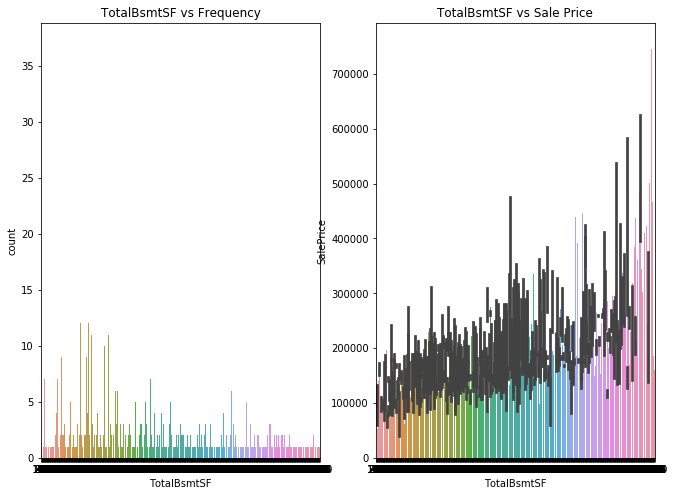

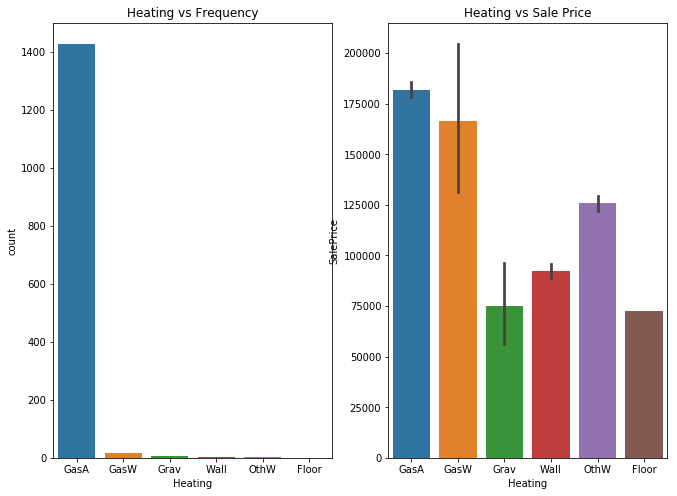

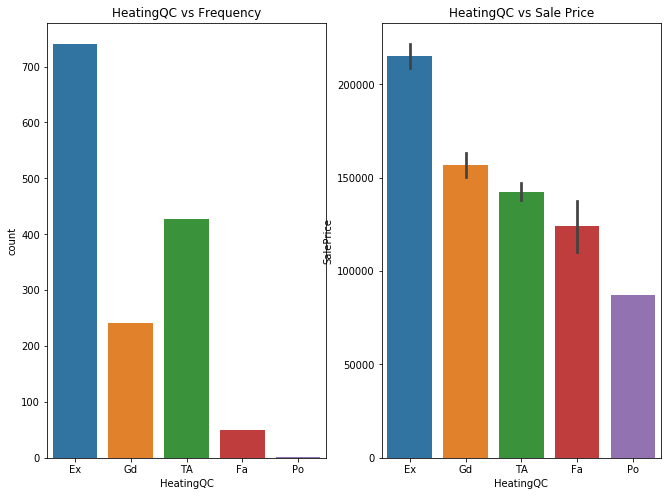

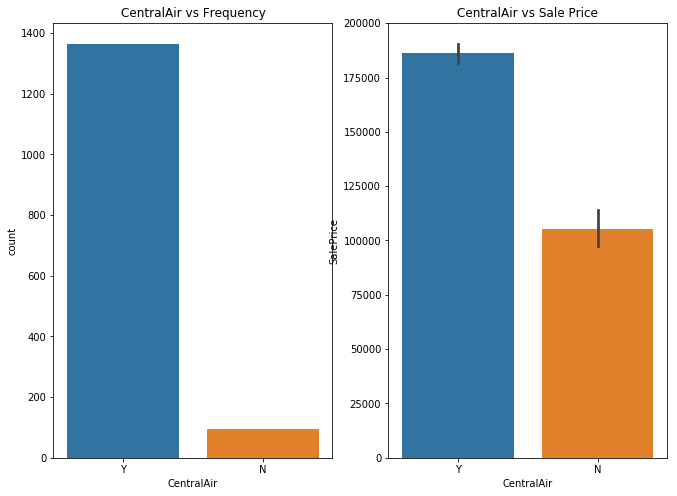

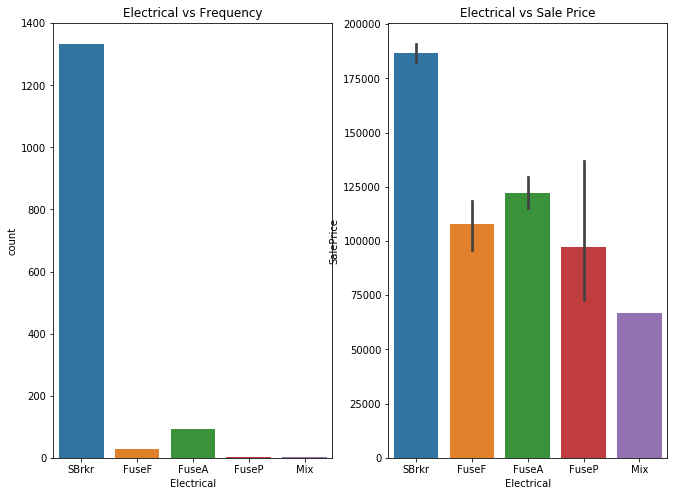

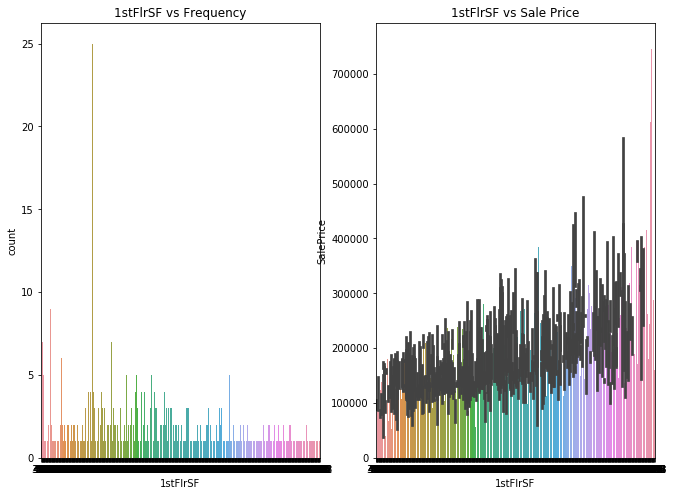

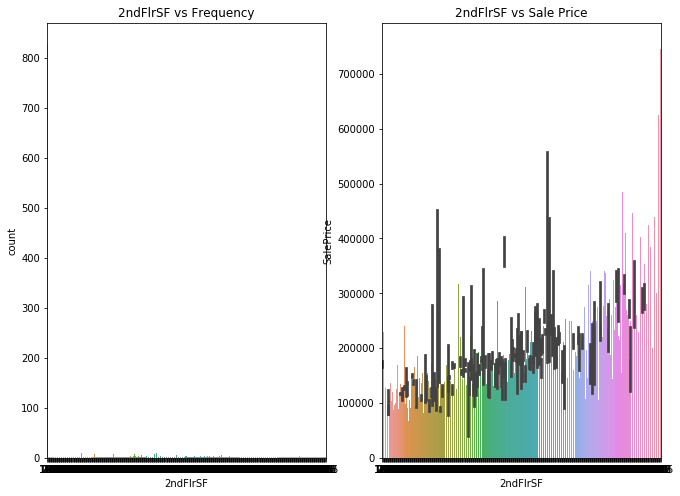

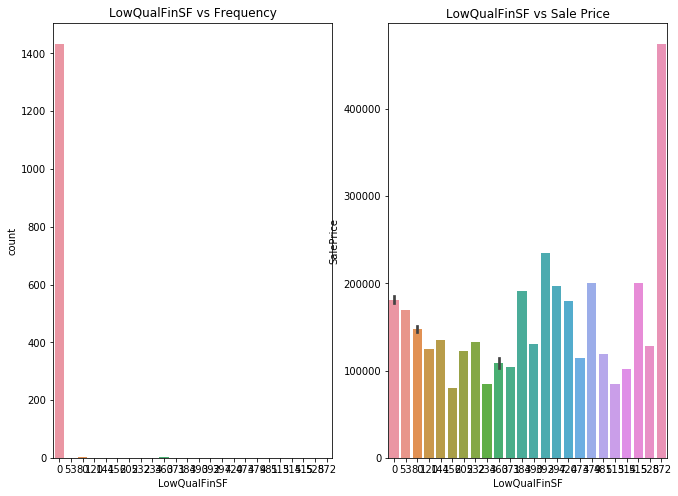

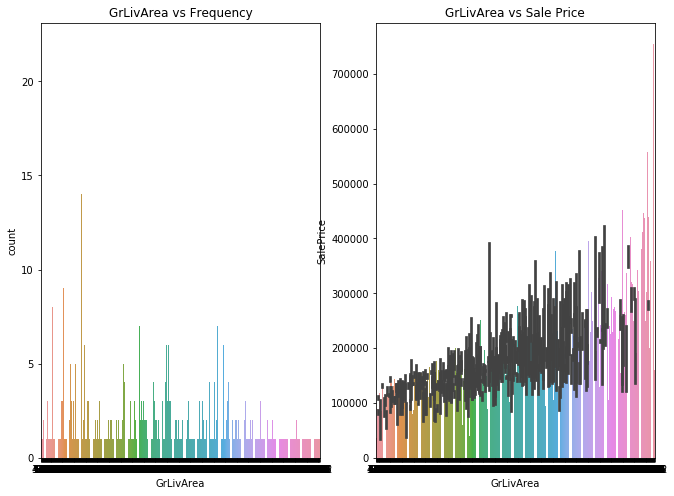

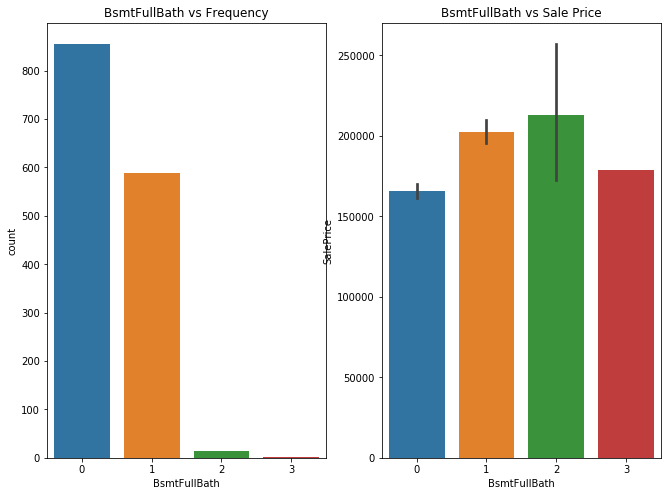

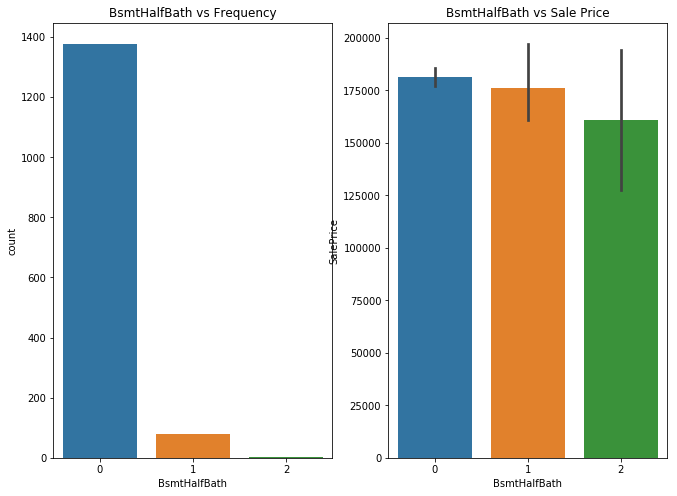

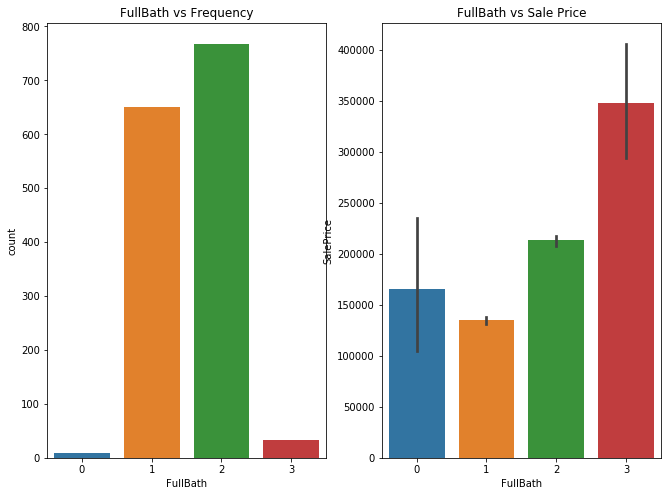

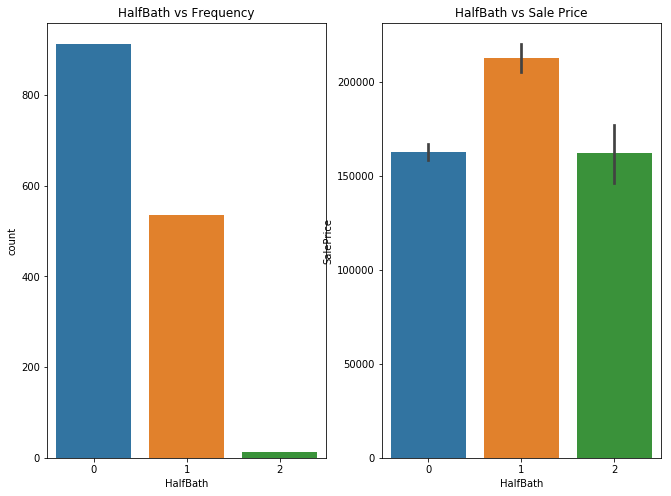

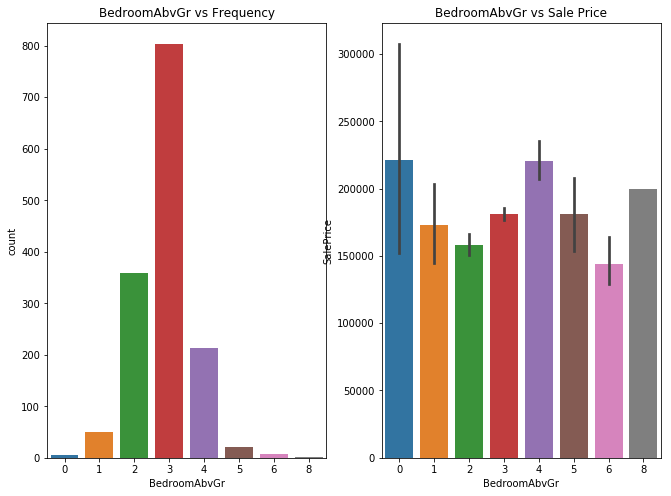

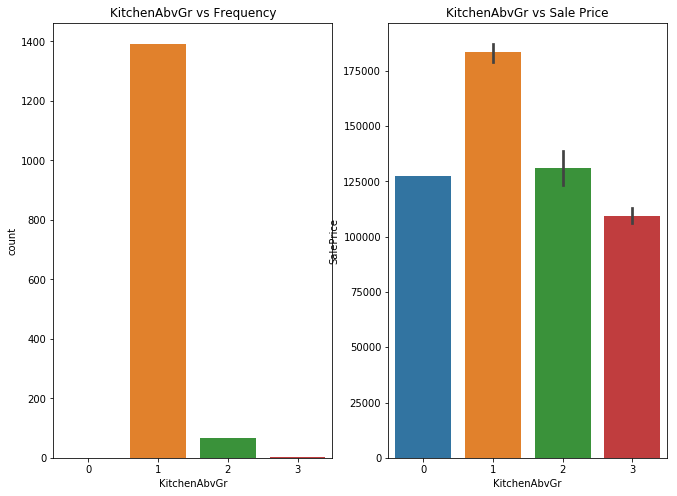

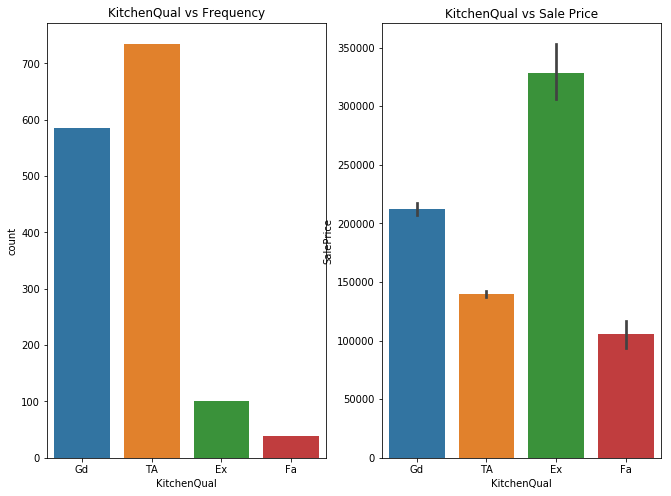

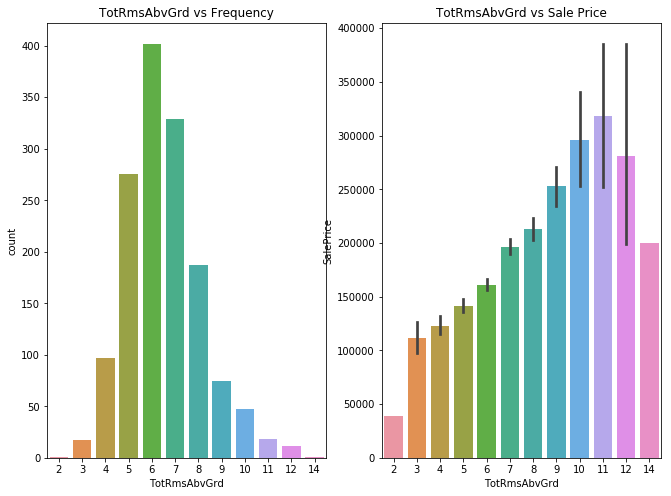

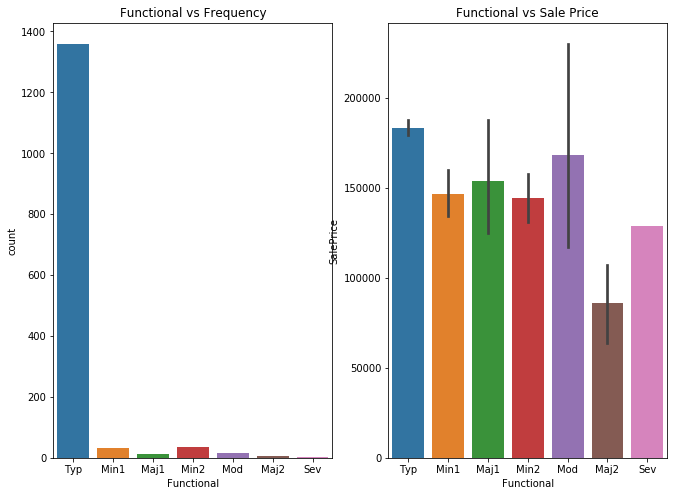

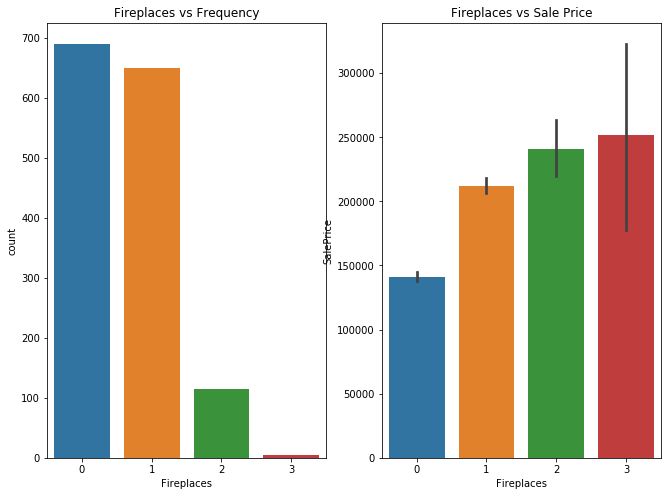

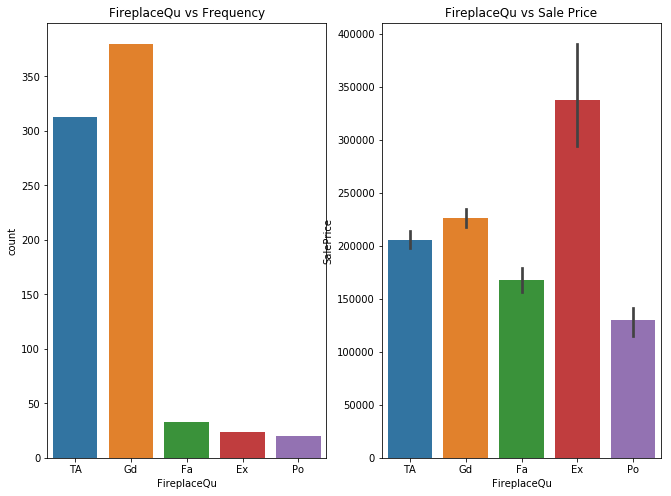

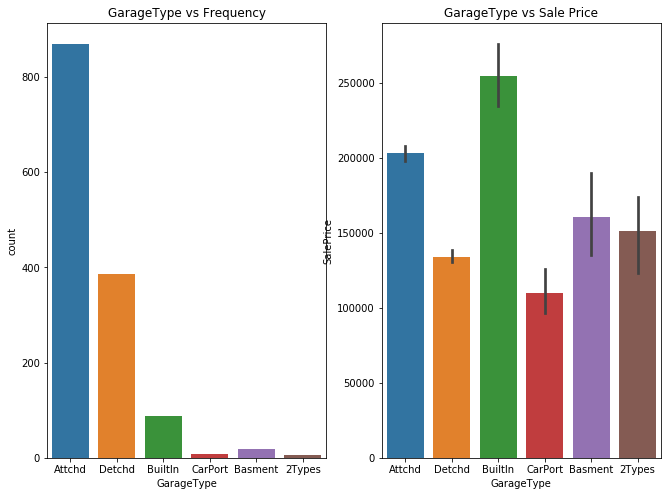

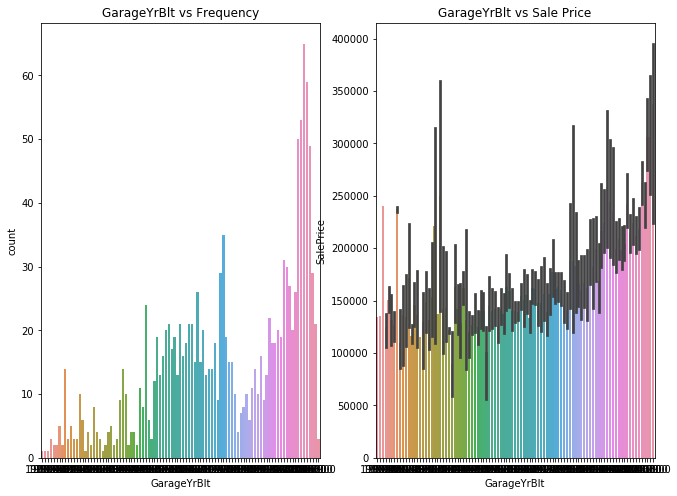

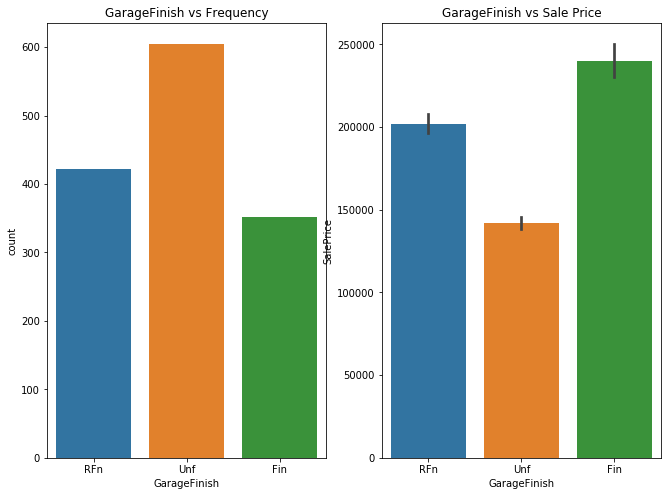

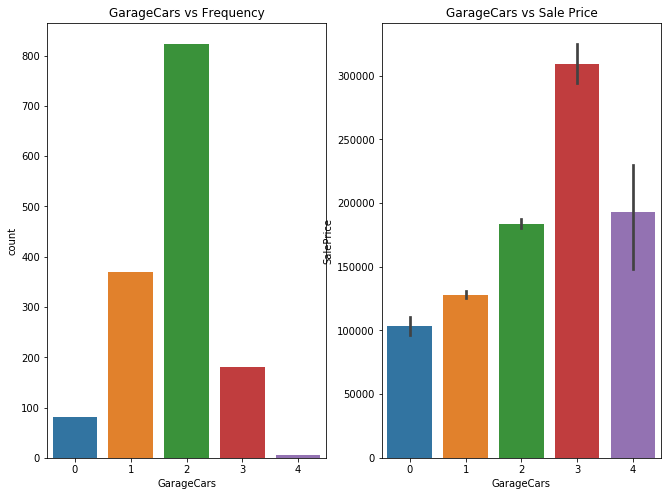

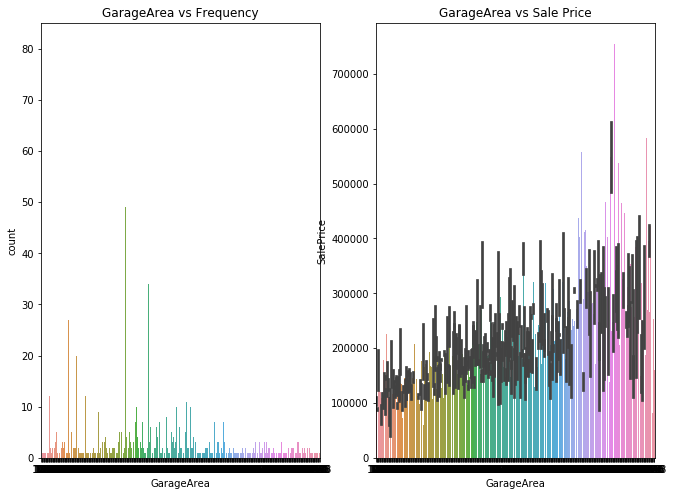

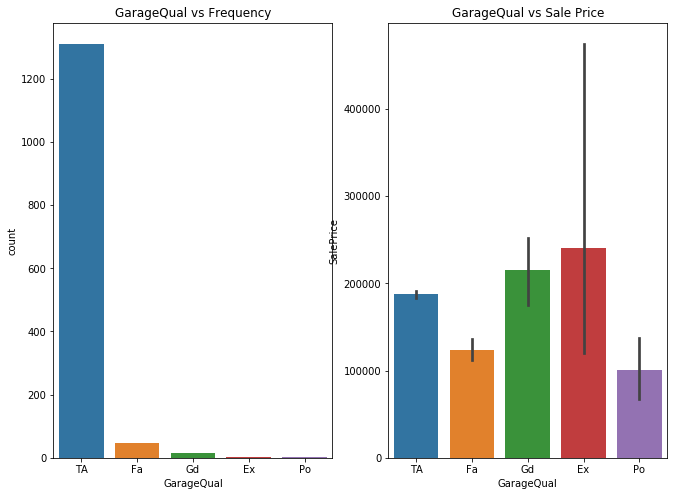

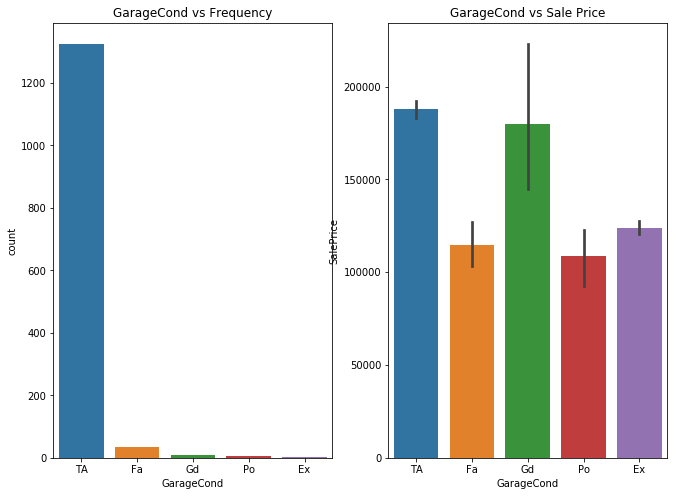

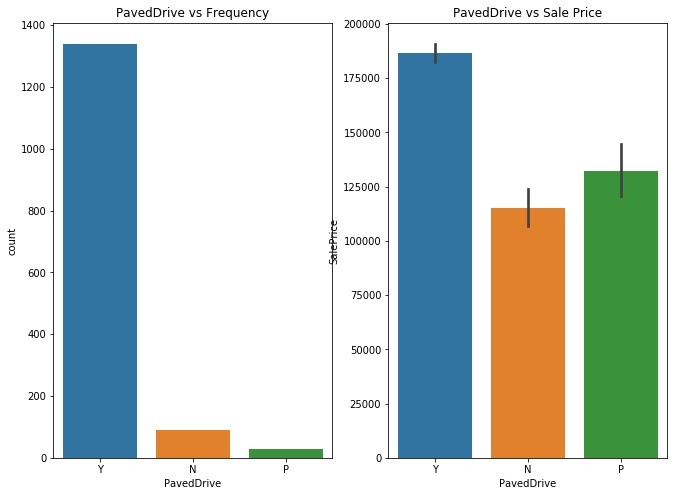

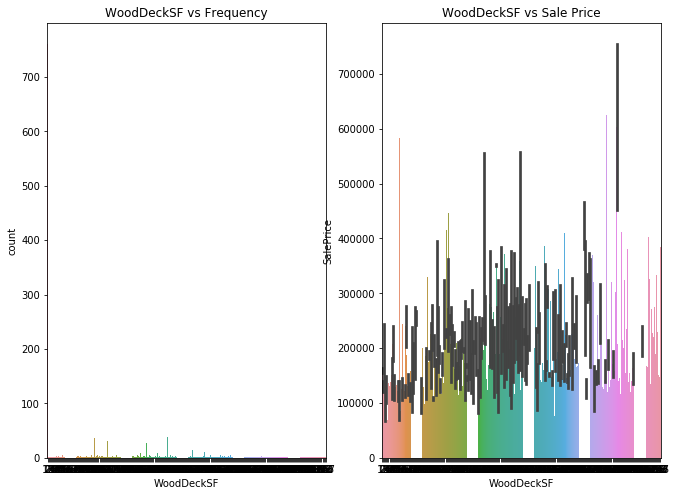

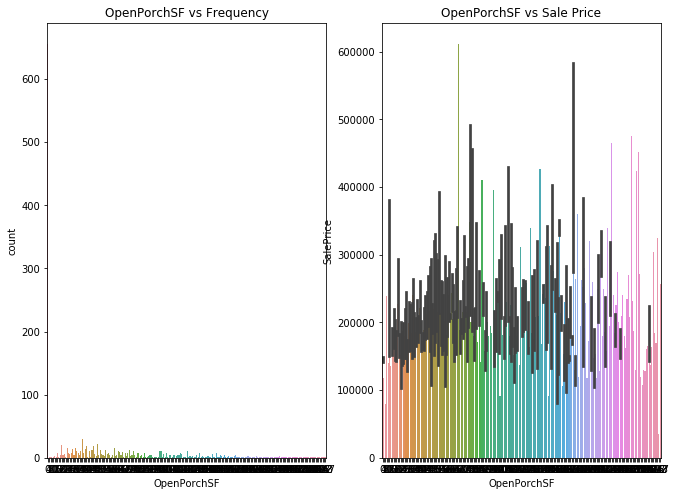

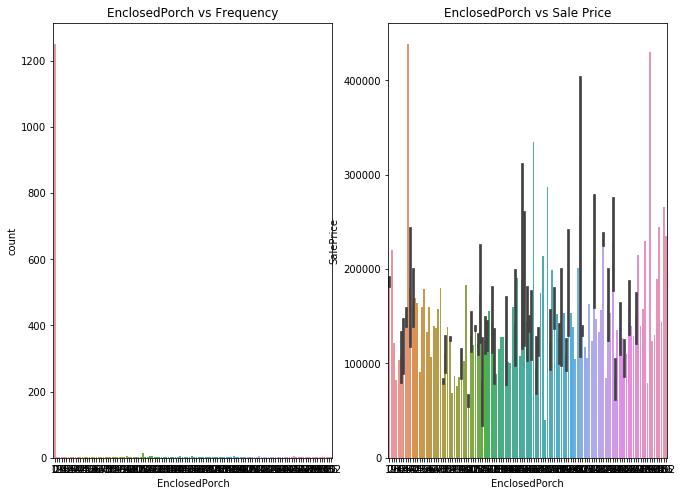

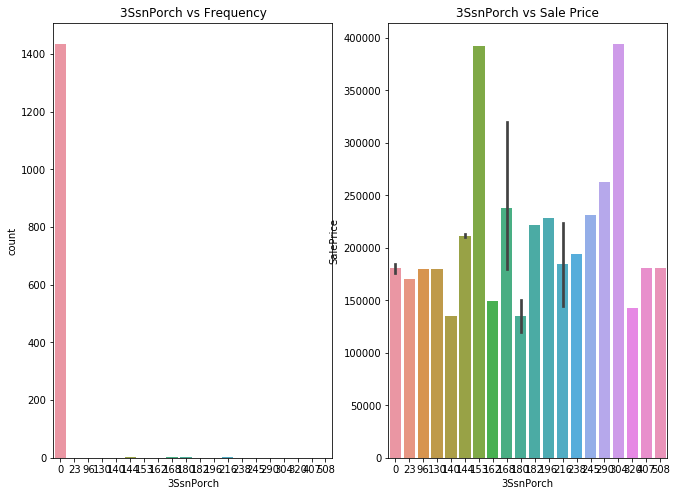

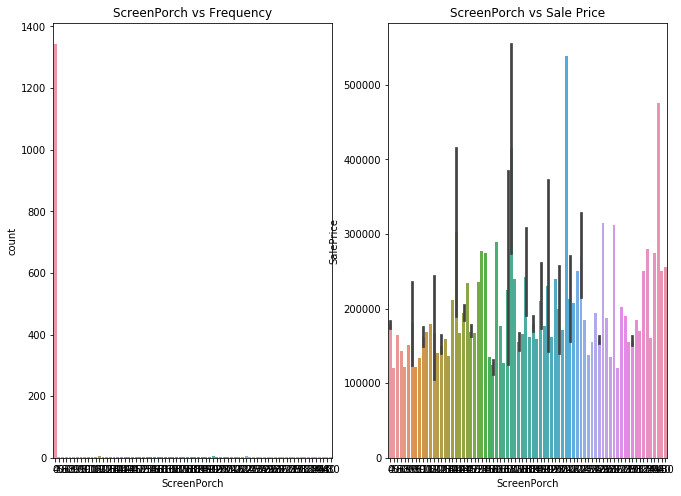

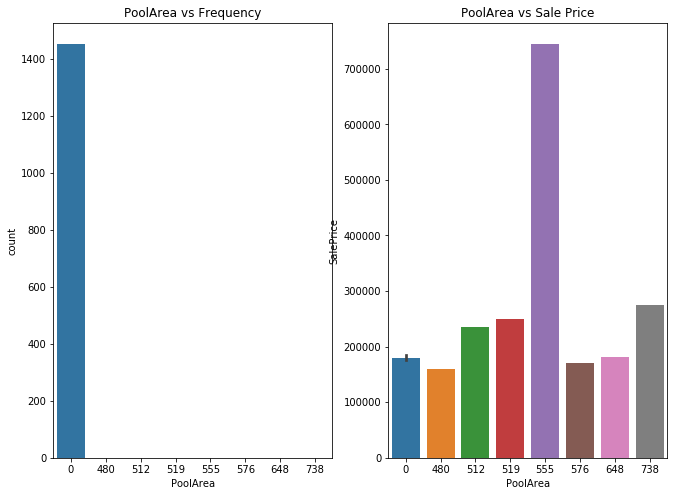

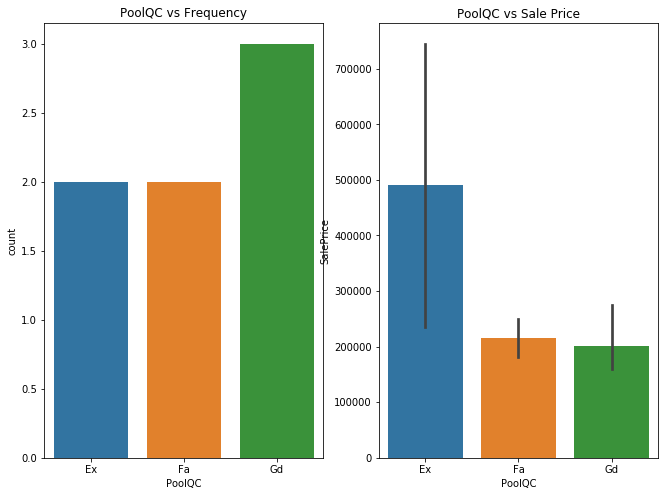

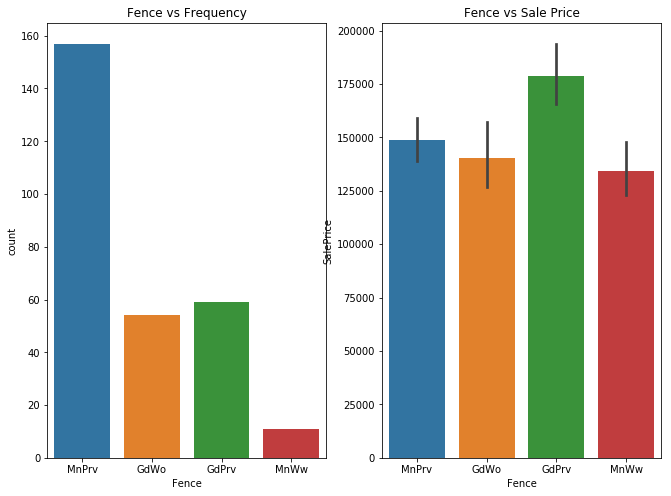

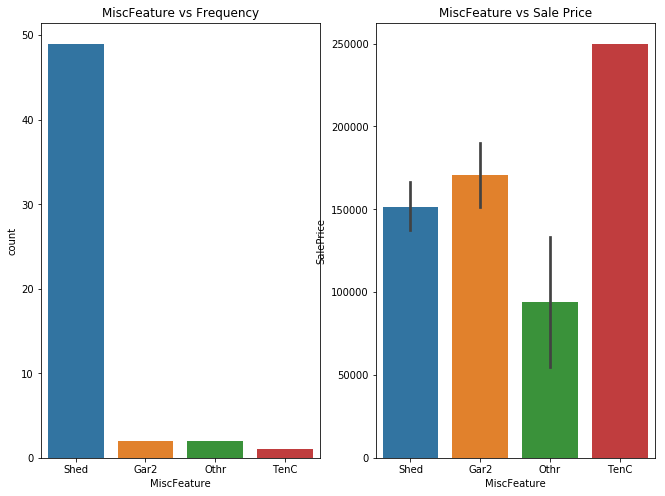

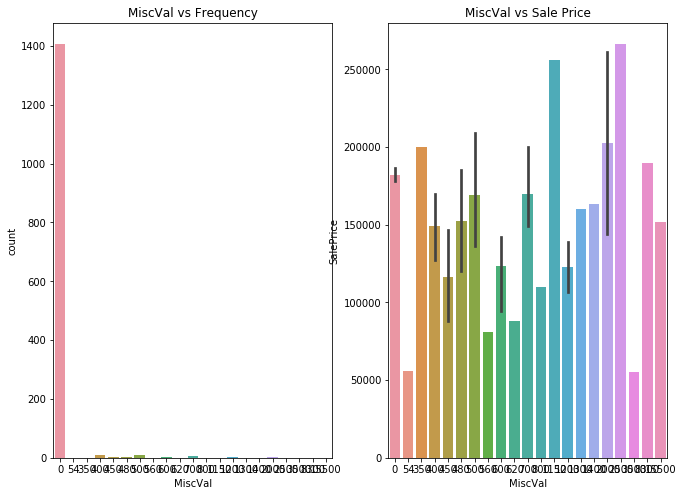

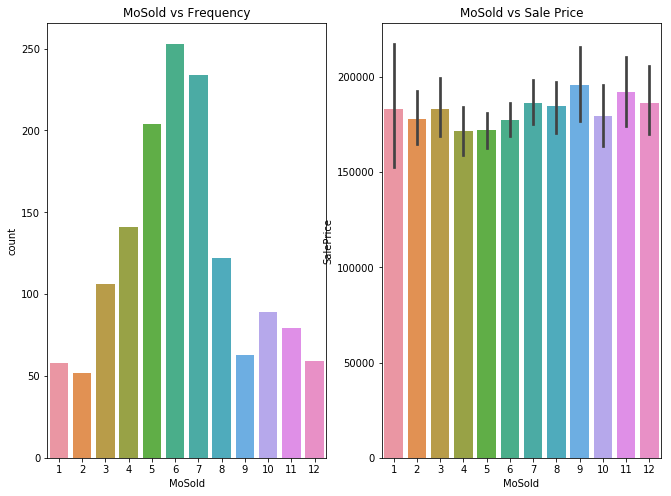

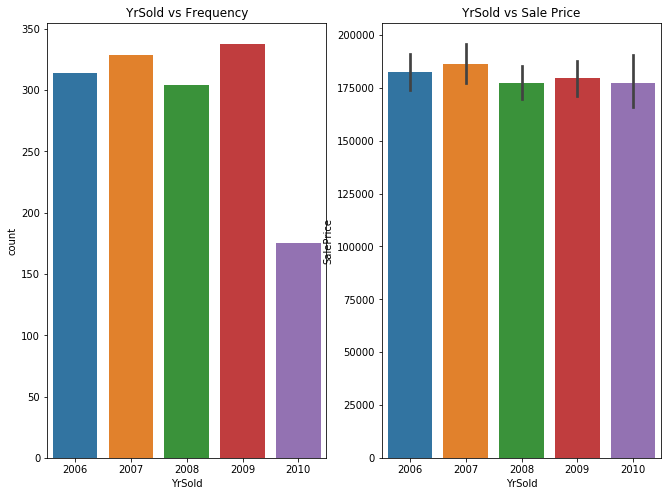

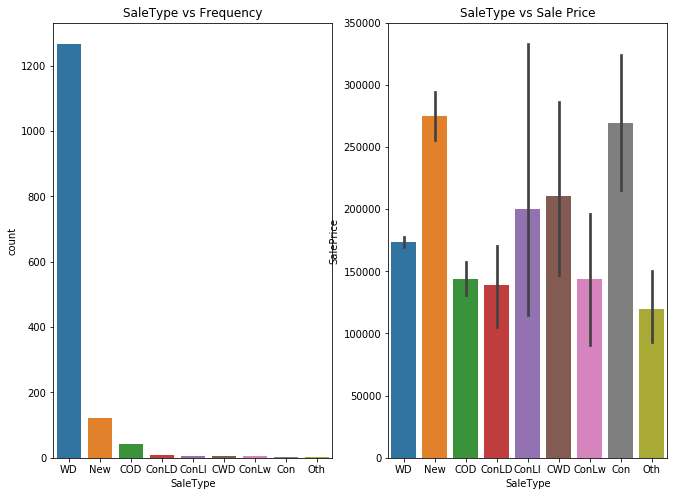

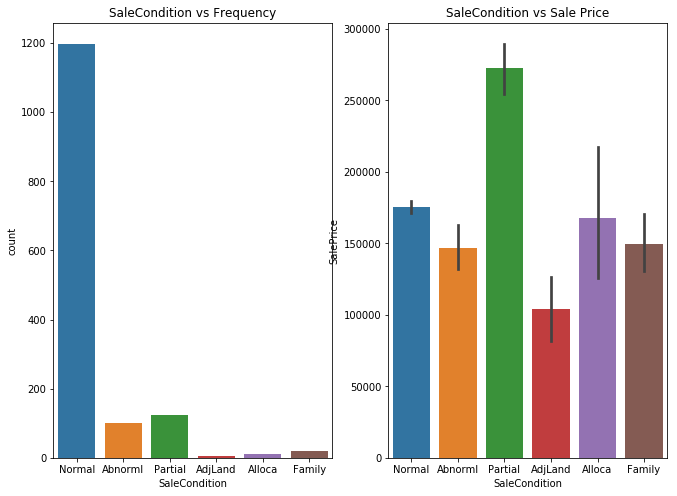

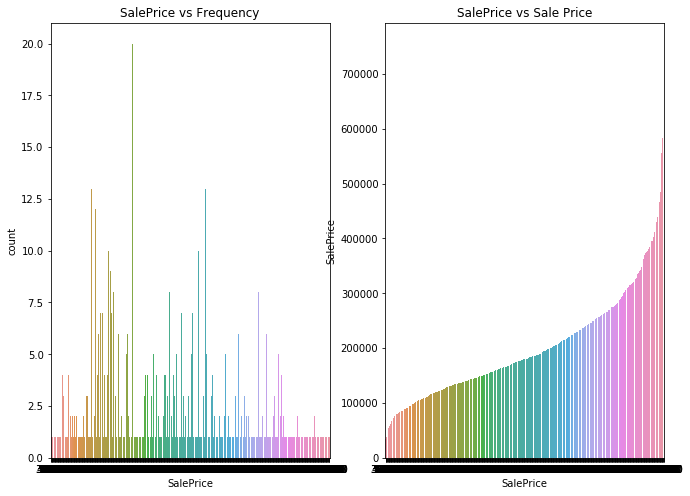

In [9]:
for x in train_data.columns:
    plotfreq(x)

In [10]:
train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


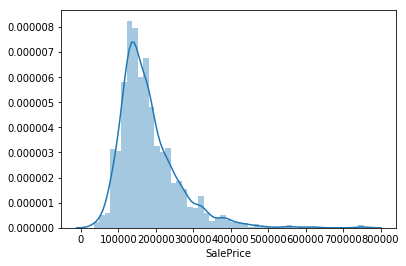

In [11]:
sns.distplot(train_data.SalePrice)

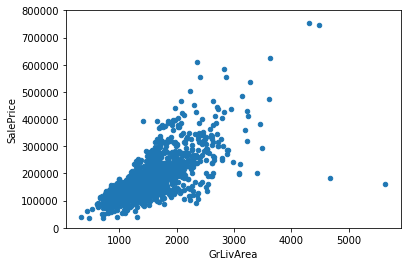

In [13]:
scatterplot('GrLivArea')

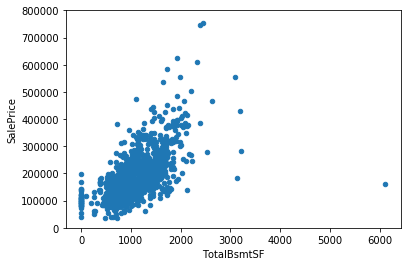

In [14]:
scatterplot('TotalBsmtSF')

In [15]:
def boxplot(feature):
    f, ax = plt.subplots(figsize=(8, 6))
    fig = sns.boxplot(x=feature, y="SalePrice", data=train_data)
    fig.axis(ymin=0, ymax=800000);

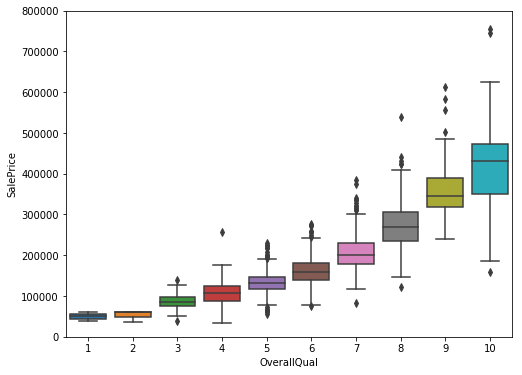

In [16]:
boxplot('OverallQual')

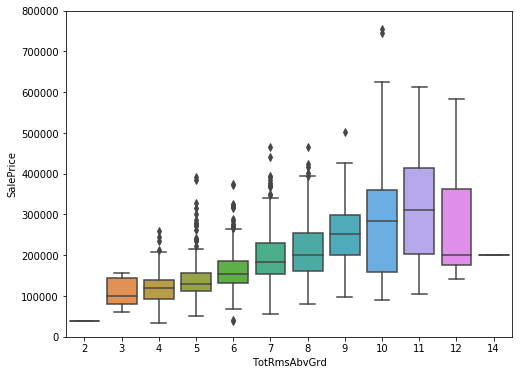

In [17]:
boxplot('TotRmsAbvGrd')

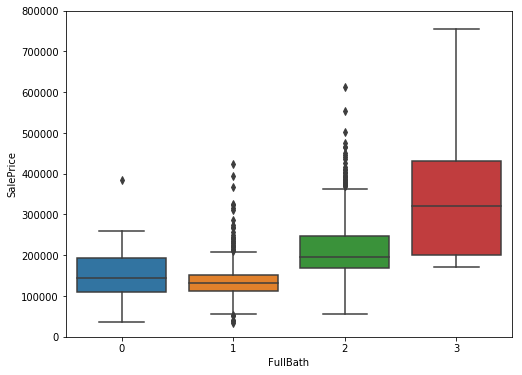

In [18]:
boxplot('FullBath')

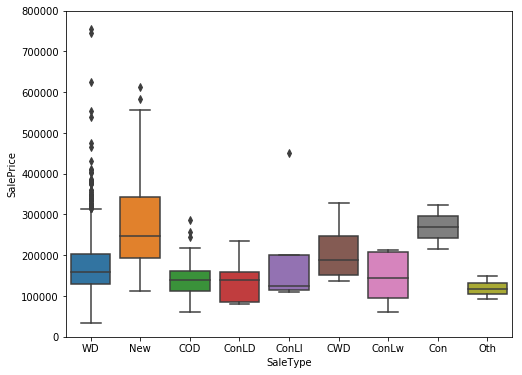

In [19]:
boxplot('SaleType')

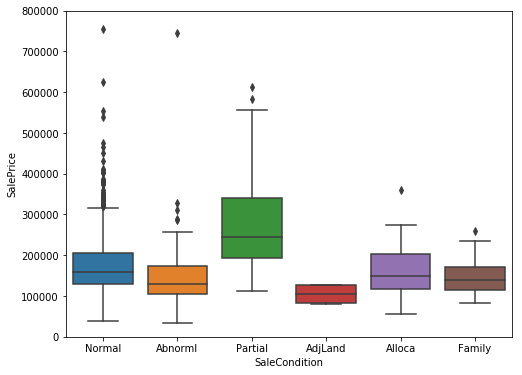

In [20]:
boxplot('SaleCondition')

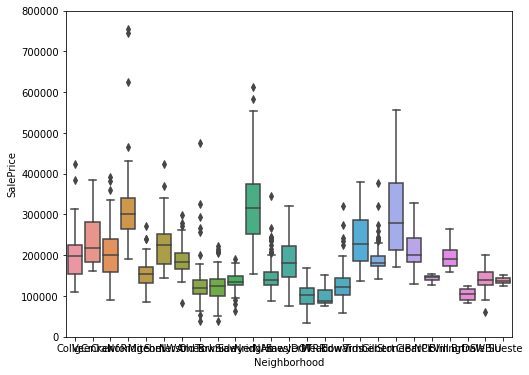

In [21]:
boxplot('Neighborhood')

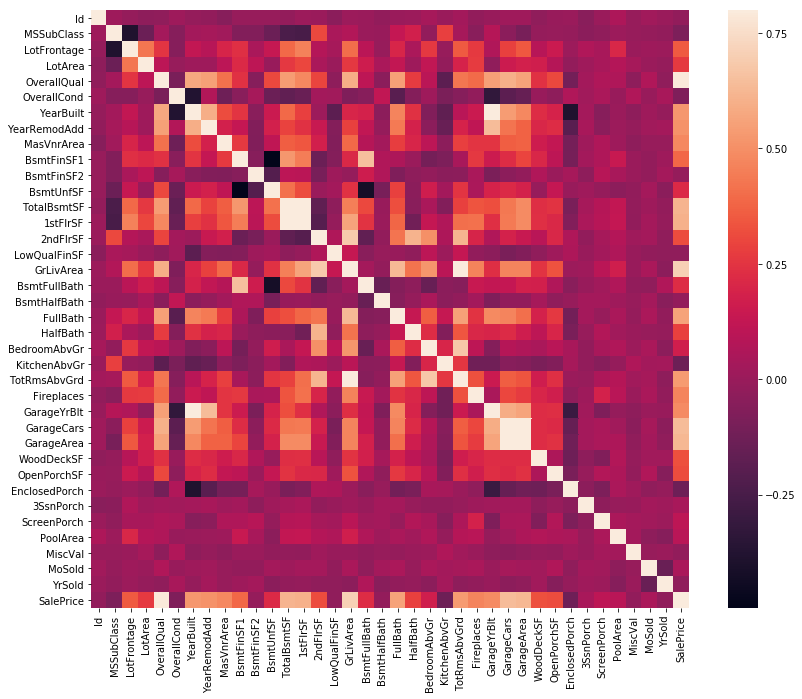

In [22]:
#correlation matrix
corrmat = train_data.corr()
f, ax = plt.subplots(figsize=(14, 11))
sns.heatmap(corrmat, vmax=.8, square=True);

At first sight, there are two red colored squares that get my attention. The first one refers to the 'TotalBsmtSF' and '1stFlrSF' variables, and the second one refers to the 'GarageX' variables. Both cases show how significant the correlation is between these variables. Actually, this correlation is so strong that it can indicate a situation of multicollinearity. If we think about these variables, we can conclude that they give almost the same information so multicollinearity really occurs. Heatmaps are great to detect this kind of situations and in problems dominated by feature selection, like ours, they are an essential tool.

Another thing that got my attention was the 'SalePrice' correlations. We can see our well-known 'GrLivArea', 'TotalBsmtSF', and 'OverallQual' saying a big 'Hi!', but we can also see many other variables that should be taken into account. That's what we will do next.

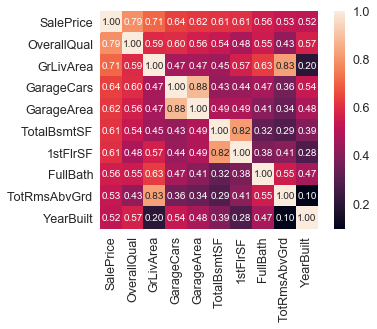

In [23]:
#saleprice correlation matrix with 10 largest corr
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train_data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

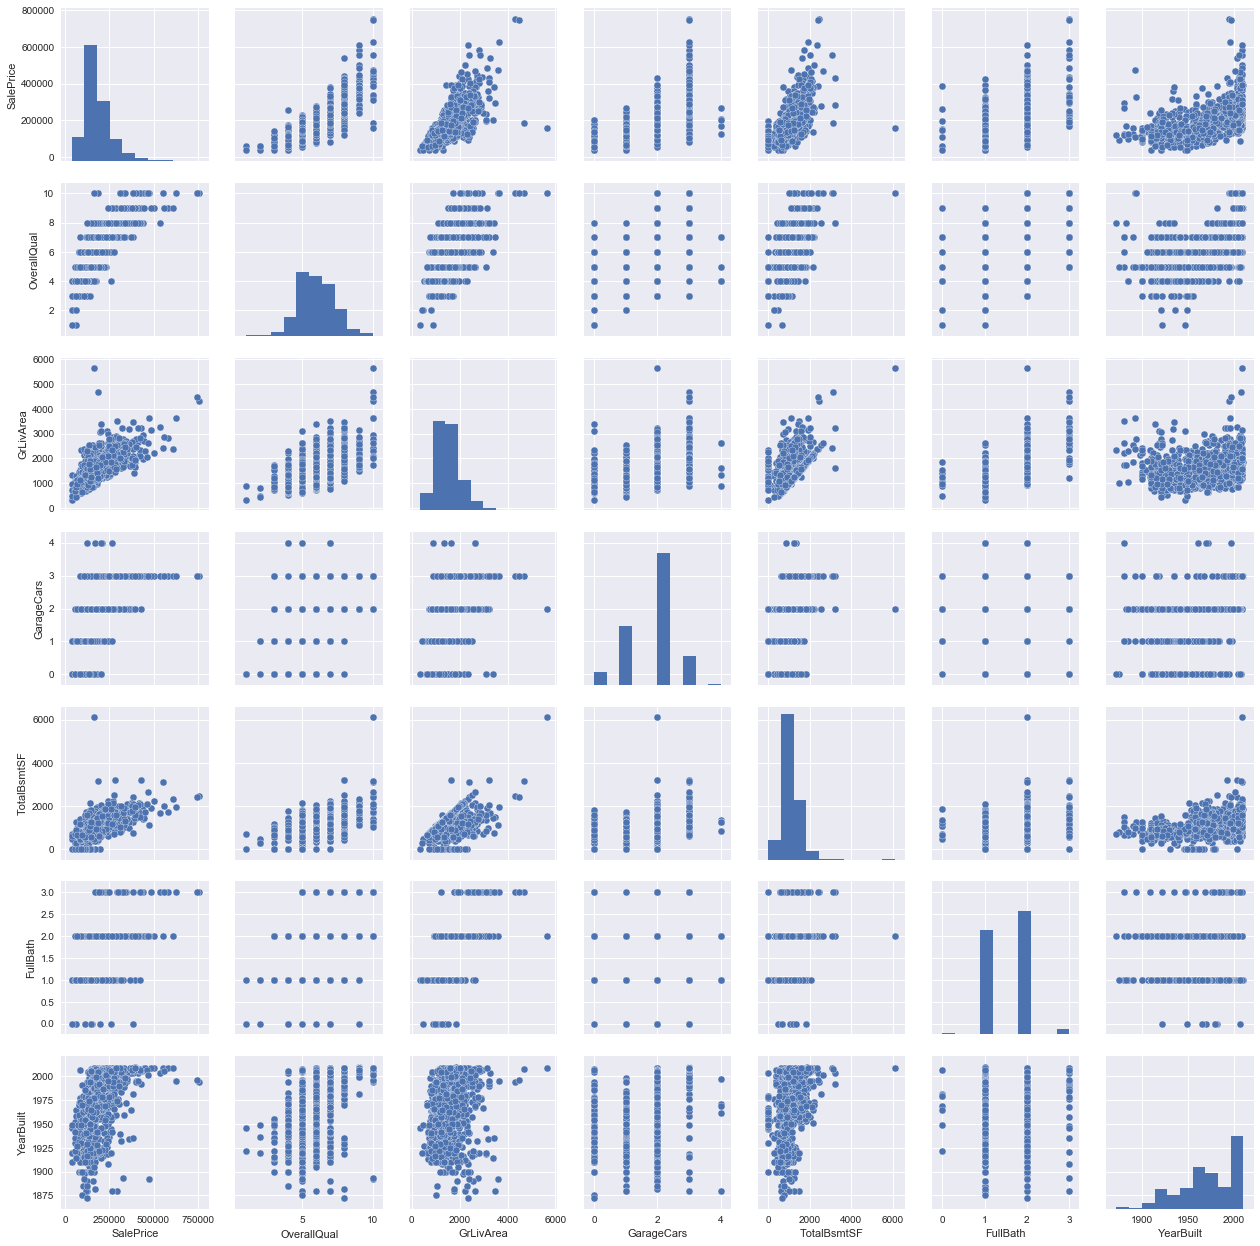

In [24]:
#scatterplot using pairplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train_data[cols], size = 2.5)
plt.show();

In [31]:
#missing data
total = train_data.isnull().sum().sort_values(ascending=False)
percent = (train_data.isnull().sum()/train_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [33]:
train_data.Electrical.describe()

count      1459
unique        5
top       SBrkr
freq       1334
Name: Electrical, dtype: object

In [49]:
train_data.Electrical.mode()[0]

'SBrkr'

In [55]:
train_data.loc[train_data['Electrical'].isnull(), "Electrical"] = train_data.Electrical.mode()[0]

In [57]:
train_data['Electrical'].isnull().sum()

0

In [59]:
#delete missing data
train_data = train_data.drop((missing_data[missing_data['Total']>1]).index,1)

##### Looking at Outliers

In [71]:
#standardizing data
#Use standardscaler() to fit salesprice into mean 0 and SD of 1

saleprice_scaled = StandardScaler().fit_transform(train_data['SalePrice'][:,np.newaxis]);

print(saleprice_scaled.mean(), '\n', saleprice_scaled.std())

#output lowest 10 and highest 10
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]

print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

1.3626846987180004e-16 
 0.9999999999999998
outer range (low) of the distribution:
[[-1.83870376]
 [-1.83352844]
 [-1.80092766]
 [-1.78329881]
 [-1.77448439]
 [-1.62337999]
 [-1.61708398]
 [-1.58560389]
 [-1.58560389]
 [-1.5731    ]]

outer range (high) of the distribution:
[[3.82897043]
 [4.04098249]
 [4.49634819]
 [4.71041276]
 [4.73032076]
 [5.06214602]
 [5.42383959]
 [5.59185509]
 [7.10289909]
 [7.22881942]]


Two Outliers at 7

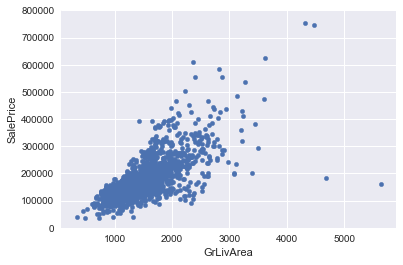

In [72]:
scatterplot('GrLivArea')

We see the 4 outliers over 4000 Living Area. The two at the bottom may include Agricultural Areas that would explain the low price, whereas the 2 at the top seem to be following the trend, and so are kept for now.

In [80]:
train_data[train_data.GrLivArea > 4500]

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,524,60,RL,40094,Pave,IR1,Bnk,AllPub,Inside,Gtl,...,0,0,0,0,0,10,2007,New,Partial,184750
1298,1299,60,RL,63887,Pave,IR3,Bnk,AllPub,Corner,Gtl,...,0,0,0,480,0,1,2008,New,Partial,160000


In [81]:
train_data[train_data['Id'] == 524]

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,524,60,RL,40094,Pave,IR1,Bnk,AllPub,Inside,Gtl,...,0,0,0,0,0,10,2007,New,Partial,184750


In [83]:
train_data2 = train_data.drop(train_data[train_data['Id'] == 524].index)

In [84]:
train_data2 = train_data2.drop(train_data[train_data['Id'] == 1299].index)

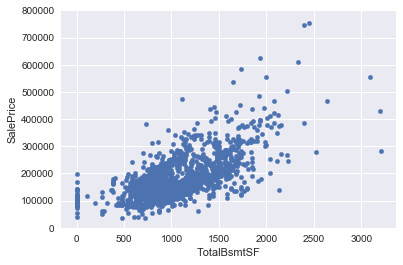

In [89]:
scatterplot('TotalBsmtSF', train_data2)

#### Now we analyse Sales Price in more detailed fashion!! (According to Hair et al. (2013))

- **Normality**

An important factor to consider where data should have a normal distribution. Important because statistical tests rely on this assumption of normality (e.g. t-tests). We can check for univariate normality here, even though it doesn't guarantee multivariate normality, it is better than nothing. Also, a large sample size (~200+) means normality is not as big an issue.

- **Homoscedasticity** (or homogeneity of variance of variables)

Assumption where dependent variables have almost equal levels of variance. Desirable as we want the error term to be the same across all values of y

- **Linearity**

If patterns are not linear, we could look at data transformation to create linear relationships. But so far the scatter plots reveal mostly linear relationships

- **Correlated Errors**

Errors that correlate, signalling a relationship between the two variables. Occurs often in time series. If detected, should add a variable that explains the effects observed

We can look at two plots for each variable:
- **Histogram** - for Kurtosis (weight of the two tails - suggests outliers) and skewdness (measure of symmetry vs skew) #note that https://www.spcforexcel.com/knowledge/basic-statistics/are-skewness-and-kurtosis-useful-statistics suggests these metrics are largely useless as they both approach 0 with a large enough sample size. But the histogram itself is fairly useful to look at regardless
- **Normal probability plot** - Compare plot with normal distribution

In [91]:
def normalplot(feature, data=train_data2):
    sns.distplot(data[feature], fit=norm)
    fig = plt.figure()
    res = stats.probplot(data[feature], plot=plt)

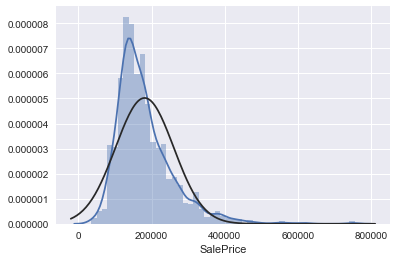

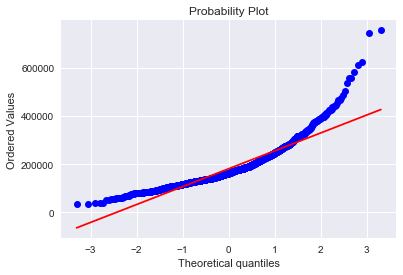

In [92]:
normalplot('SalePrice')

We see some positive skew... (measured by mean > median > mode)

log transformations work wonders in these situations

In [93]:
train_data2.SalePrice = np.log(train_data2.SalePrice)

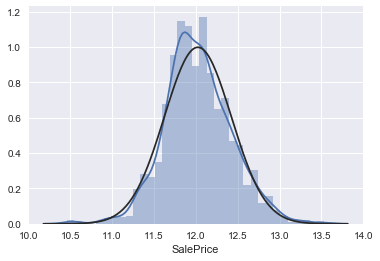

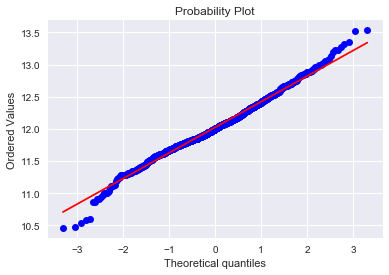

In [94]:
normalplot('SalePrice')

Magic!

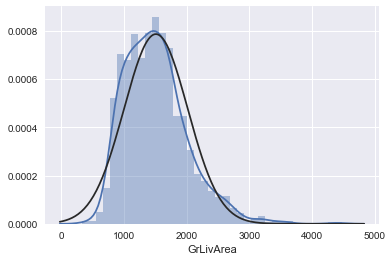

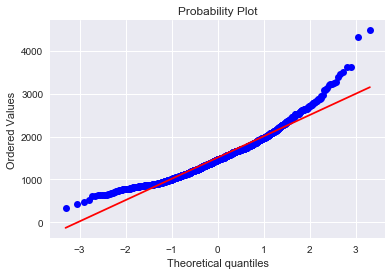

In [95]:
normalplot('GrLivArea')

In [96]:
train_data2.GrLivArea = np.log(train_data2.GrLivArea)

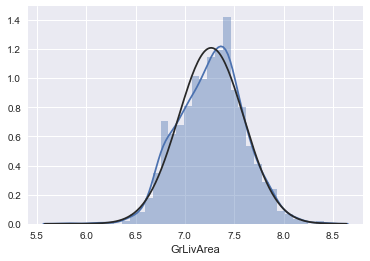

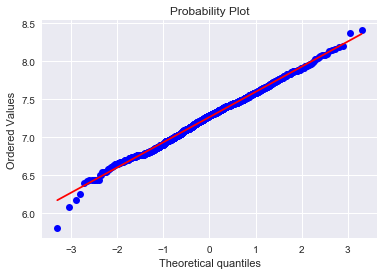

In [97]:
normalplot('GrLivArea')

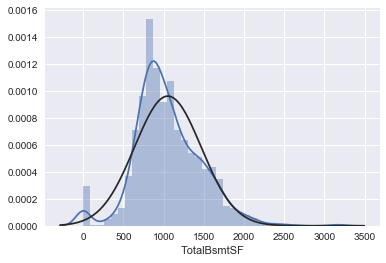

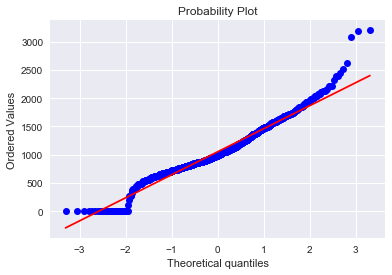

In [98]:
normalplot('TotalBsmtSF')

Problem - we cannot log zero values

Let's log the non-zero values only (warning - high risk!)

In [106]:
train_data3 = train_data2.copy()

In [108]:
train_data3.TotalBsmtSF

0        856
1       1262
2        920
3        756
4       1145
5        796
6       1686
7       1107
8        952
9        991
10      1040
11      1175
12       912
13      1494
14      1253
15       832
16      1004
17         0
18      1114
19      1029
20      1158
21       637
22      1777
23      1040
24      1060
25      1566
26       900
27      1704
28      1484
29       520
        ... 
1430     732
1431     958
1432     656
1433     936
1434    1126
1435    1319
1436     864
1437    1932
1438     912
1439     539
1440     588
1441     848
1442    1017
1443     952
1444    1422
1445     814
1446    1188
1447    1220
1448     560
1449     630
1450     896
1451    1573
1452     547
1453    1140
1454    1221
1455     953
1456    1542
1457    1152
1458    1078
1459    1256
Name: TotalBsmtSF, Length: 1458, dtype: int64

In [111]:
train_data3.TotalBsmtSF = train_data3.TotalBsmtSF.apply(lambda x:np.log(x) if x !=0 else 0)

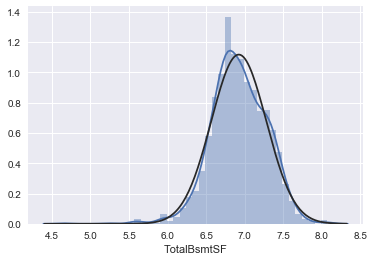

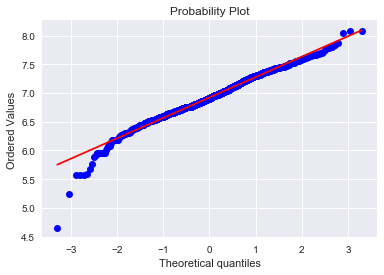

In [118]:
#histogram and normal probability plot
sns.distplot(train_data3[train_data3['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(train_data3[train_data3['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

##### Homoscedasticity issues

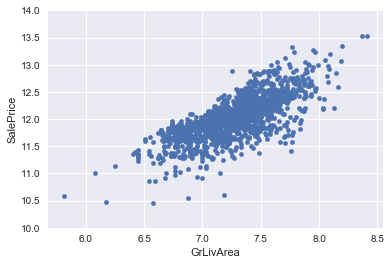

In [129]:
scatterplot('GrLivArea', train_data3, (10,14))

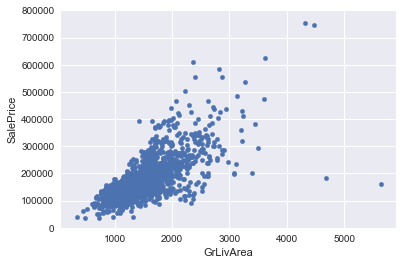

In [131]:
scatterplot('GrLivArea', train_data)

Evidently, compared to before, the conic shape is gone. Normality has solved Homoscedastiscity problems!

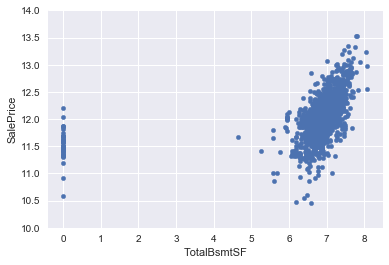

In [132]:
scatterplot('TotalBsmtSF', train_data3, (10,14))

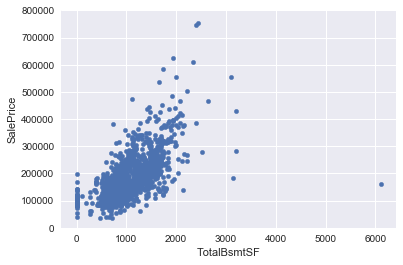

In [133]:
scatterplot('TotalBsmtSF', train_data)

In [135]:
train_data3.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageCars', 'GarageArea',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice'],
      dtype='object')

In [141]:
columnslist = train_data3.columns.tolist()

In [143]:
columnstokeep = ['OverallQual', 'GrLivArea','GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt', 'SalePrice']

In [147]:
train_data_final = train_data3[columnstokeep]

In [149]:
train_data_final.head()

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt,SalePrice
0,7,7.444249,2,6.752270,2,2003,12.247694
1,6,7.140453,2,7.140453,2,1976,12.109011
2,7,7.487734,2,6.824374,2,2001,12.317167
3,7,7.448334,3,6.628041,1,1915,11.849398
4,8,7.695303,3,7.043160,2,2000,12.429216


In [151]:
train_data_final.values[0::, -1]

array([12.24769432, 12.10901093, 12.31716669, ..., 12.49312952,
       11.86446223, 11.90158345])

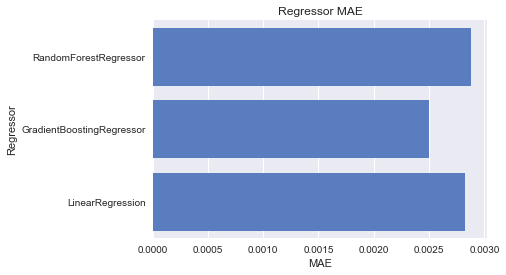

In [157]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, log_loss, f1_score, mean_squared_error
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.svm import SVC
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
#from sklearn.naive_bayes import GaussianNB
#from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor

regressors = [
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    LinearRegression()]

log_cols = ["Regressor", "MAE"]
log 	 = pd.DataFrame(columns=log_cols)


X = train_data_final.values[0::, 0:-1:]
y = train_data_final.values[0::, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=42, 
                                                    test_size=0.33)
acc_dict = {}


for clf in regressors:
	name = clf.__class__.__name__
	clf.fit(X_train, y_train)
	train_predictions = clf.predict(X_test)
	acc = mean_squared_error(y_test, train_predictions)
	if name in acc_dict:
		acc_dict[name] += acc
	else:
		acc_dict[name] = acc

for clf in acc_dict:
	acc_dict[clf] = acc_dict[clf] / 10.0
	log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
	log = log.append(log_entry)

plt.xlabel('MAE')
plt.title('Regressor MAE')

sns.set_color_codes("muted")
sns.barplot(x='MAE', y='Regressor', data=log, color="b")

In [179]:
test_data_touse = test_data[train_data_final.columns.tolist()[:-1]]

In [185]:
test_data_touse.GarageCars.describe()

count    1458.000000
mean        1.766118
std         0.775945
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         5.000000
Name: GarageCars, dtype: float64

In [183]:
test_data_touse[test_data_touse.GarageCars.isnull()]

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt
1116,5,1828,NaN,859.0,2,1923


In [191]:
test_data_touse.iloc[1116,2]

nan

In [193]:
test_data_touse.iloc[1116,2] = test_data_touse.GarageCars.mean()

In [194]:
test_data_touse.iloc[1116,:]

OverallQual       5.000000
GrLivArea      1828.000000
GarageCars        1.766118
TotalBsmtSF     859.000000
FullBath          2.000000
YearBuilt      1923.000000
Name: 1116, dtype: float64

In [188]:
test_data_touse[test_data_touse.TotalBsmtSF.isnull()]

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt
660,4,896,1.0,NaN,1,1946


In [192]:
test_data_touse.iloc[660,3]

nan

In [195]:
test_data_touse.iloc[660,3] = test_data_touse.TotalBsmtSF.mean()

In [196]:
test_data_touse.iloc[660,:]

OverallQual       4.00000
GrLivArea       896.00000
GarageCars        1.00000
TotalBsmtSF    1046.11797
FullBath          1.00000
YearBuilt      1946.00000
Name: 660, dtype: float64

Need to remember to log the 2 positively skewed X variables!

In [207]:
test_data_touse.TotalBsmtSF = test_data_touse.TotalBsmtSF.apply(lambda x:np.log(x) if x !=0 else 0)

In [208]:
test_data_touse.GrLivArea = test_data_touse.GrLivArea.apply(lambda x:np.log(x))

In [209]:
candidate_classifier = GradientBoostingRegressor()
candidate_classifier.fit(train_data_final.iloc[0::, :-1:], train_data_final.iloc[0::, -1])
result = candidate_classifier.predict(test_data_touse)

In [210]:
result

array([11.73039958, 11.91703896, 12.01426469, ..., 11.91248223,
       11.71910474, 12.40886107])

In [211]:
resultexp = np.exp(result)

In [212]:
resultexp

array([124293.32549408, 149797.39512558, 165093.07591729, ...,
       149116.36178173, 122897.35063004, 244962.6590081 ])

In [213]:
my_submission = pd.DataFrame({'Id':test_data.Id, 'SalePrice': resultexp})

In [214]:
my_submission.to_csv('HousingGradB2.csv', index=False)